# Perqara Assessment Data Scientist - RIJAL AKHDAN KHAIRULAH

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib.ticker import FuncFormatter
from matplotlib.gridspec import GridSpec
import requests
import json
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud
from collections import Counter
import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
product_category = pd.read_csv('data/product_category_name_translation.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

In [3]:
# Merge datasets
# Merge orders with customers
merged_df = pd.merge(orders, customers, on='customer_id', how='left')

# Merge the result with order_items
merged_df = pd.merge(merged_df, order_items, on='order_id', how='left')

# Merge with order_payments
merged_df = pd.merge(merged_df, order_payments, on='order_id', how='left')

# Merge with order_reviews
merged_df = pd.merge(merged_df, order_reviews, on='order_id', how='left')

# Merge with products
merged_df = pd.merge(merged_df, products, on='product_id', how='left')

# Merge with sellers
merged_df = pd.merge(merged_df, sellers, on='seller_id', how='left')

# Merge with product_category
merged_df = pd.merge(merged_df, product_category, on='product_category_name', how='left')

# Merge with geolocation
merged_df = pd.merge(merged_df, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# Save the merged dataframe to a CSV file if needed
#merged_df.to_csv('./merged_dataset.csv', index=False)

In [4]:
# Display the merged DataFrame
merged_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
4  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
4    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-10-04 19:55:00           2017-10-10 21:25:13   
4          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
2           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
3           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
4           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   

   customer_zip_code_prefix  ... product_width_cm seller_zip_code_prefix  \
0                      3149  ...             13.0                 9350.0   
1                      3149  ...             13.0                 9350.0   
2                      3149  ...             13.0                 9350.0   
3                      3149  ...             13.0                 9350.0   
4                      3149  ...             13.0                 9350.0   

   seller_city seller_state product_category_name_english  \
0         maua           SP                    housewares   
1         maua           SP                    housewares   
2         maua           SP                    housewares   
3         maua           SP                    housewares   
4         maua           SP                    housewares   

  geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                      3149.0       -23.574809       -46.587471   
1                      3149.0       -23.578333       -46.587123   
2                      3149.0       -23.574809       -46.587471   
3                      3149.0       -23.575033       -46.587451   
4                      3149.0       -23.580054       -46.586673   

   geolocation_city geolocation_state  
0         sao paulo                SP  
1         sao paulo                SP  
2         sao paulo                SP  
3         sao paulo                SP  
4         sao paulo                SP  

[5 rows x 45 columns]

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18188958 entries, 0 to 18188957
Data columns (total 45 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_carrier_date   object 
 6   order_delivered_customer_date  object 
 7   order_estimated_delivery_date  object 
 8   customer_unique_id             object 
 9   customer_zip_code_prefix       int64  
 10  customer_city                  object 
 11  customer_state                 object 
 12  order_item_id                  float64
 13  product_id                     object 
 14  seller_id                      object 
 15  shipping_limit_date            object 
 16  price                          float64
 17  freight_value                  float64
 18  

# Data Preprocessing

In [6]:
# Cek missing values
missing_values = merged_df.isnull().sum()

# Konversi kolom tanggal menjadi datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date', 
                'order_estimated_delivery_date', 'shipping_limit_date',
                'review_creation_date', 'review_answer_timestamp']

for col in date_columns:
    merged_df[col] = pd.to_datetime(merged_df[col])

# Ubah kolom float yang seharusnya integer
merged_df['payment_installments'] = merged_df['payment_installments'].fillna(0).astype(int)
merged_df['order_item_id'] = merged_df['order_item_id'].fillna(0).astype(int)

# Buang duplikasi jika ada
merged_df.drop_duplicates(inplace=True)

# Tampilkan beberapa data setelah preprocessing
merged_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
4  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
7  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
4    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
7    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-10-04 19:55:00           2017-10-10 21:25:13   
4          2017-10-04 19:55:00           2017-10-10 21:25:13   
7          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
4                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
7                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   

   customer_zip_code_prefix  ... product_width_cm seller_zip_code_prefix  \
0                      3149  ...             13.0                 9350.0   
1                      3149  ...             13.0                 9350.0   
3                      3149  ...             13.0                 9350.0   
4                      3149  ...             13.0                 9350.0   
7                      3149  ...             13.0                 9350.0   

   seller_city seller_state product_category_name_english  \
0         maua           SP                    housewares   
1         maua           SP                    housewares   
3         maua           SP                    housewares   
4         maua           SP                    housewares   
7         maua           SP                    housewares   

  geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                      3149.0       -23.574809       -46.587471   
1                      3149.0       -23.578333       -46.587123   
3                      3149.0       -23.575033       -46.587451   
4                      3149.0       -23.580054       -46.586673   
7                      3149.0       -23.576281       -46.587276   

   geolocation_city geolocation_state  
0         sao paulo                SP  
1         sao paulo                SP  
3         sao paulo                SP  
4         sao paulo                SP  
7         sao paulo                SP  

[5 rows x 45 columns]

# EDA(Exploratory Data Analysis)

## Eksplorasi Transaksi Pesanan pada layanan E-commerce

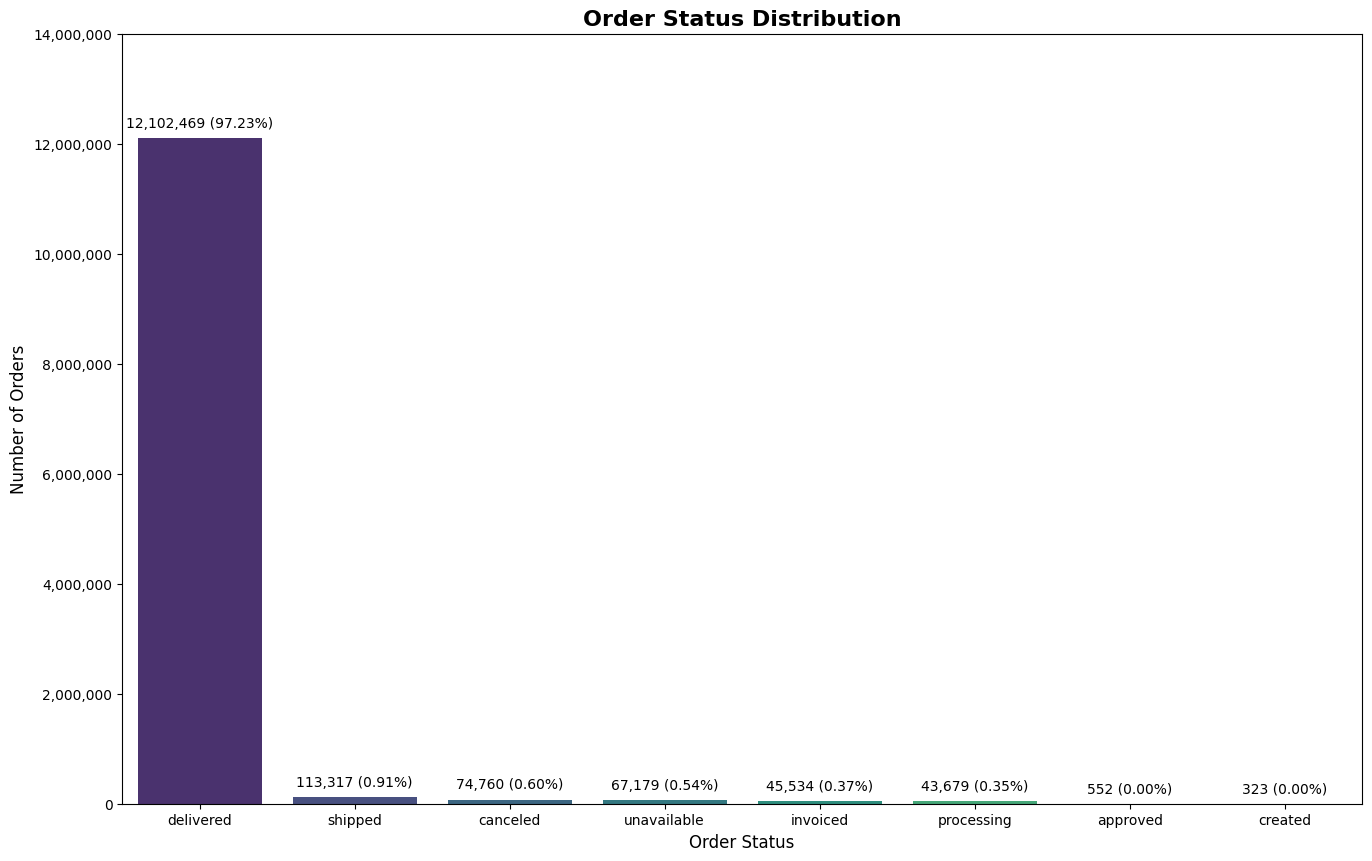

In [7]:
# Menghitung jumlah pesanan untuk setiap status
order_status_counts = merged_df['order_status'].value_counts().reset_index()
order_status_counts.columns = ['order_status', 'count']

# Menghitung persentase dari setiap status
order_status_counts['percentage'] = (order_status_counts['count'] / order_status_counts['count'].sum()) * 100

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(16, 10))

# Membuat bar chart
sns.barplot(x='order_status', y='count', data=order_status_counts, ax=ax, palette='viridis')

# Menambahkan label pada setiap bar untuk menunjukkan jumlah dan persentase
for index, row in order_status_counts.iterrows():
    ax.text(index, row['count'] + 200000, f'{row["count"]:,} ({row["percentage"]:.2f}%)', ha='center')

# Menambahkan judul dan label sumbu
ax.set_title('Order Status Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Order Status', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)

# Mengatur skala sumbu y dengan kelipatan juta (2 juta)
ax.set_yticks(range(0, int(order_status_counts['count'].max()) + 2000000, 2000000))

# Mengatur format sumbu y agar tampil dengan angka penuh (jutaan)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Menampilkan plot
plt.show()

Pada saat dataset ini dibuat, jumlah pesanan tertinggi berasal dari order berstatus delivered. Hanya 3% dari semua order berasal dari status lainnya.

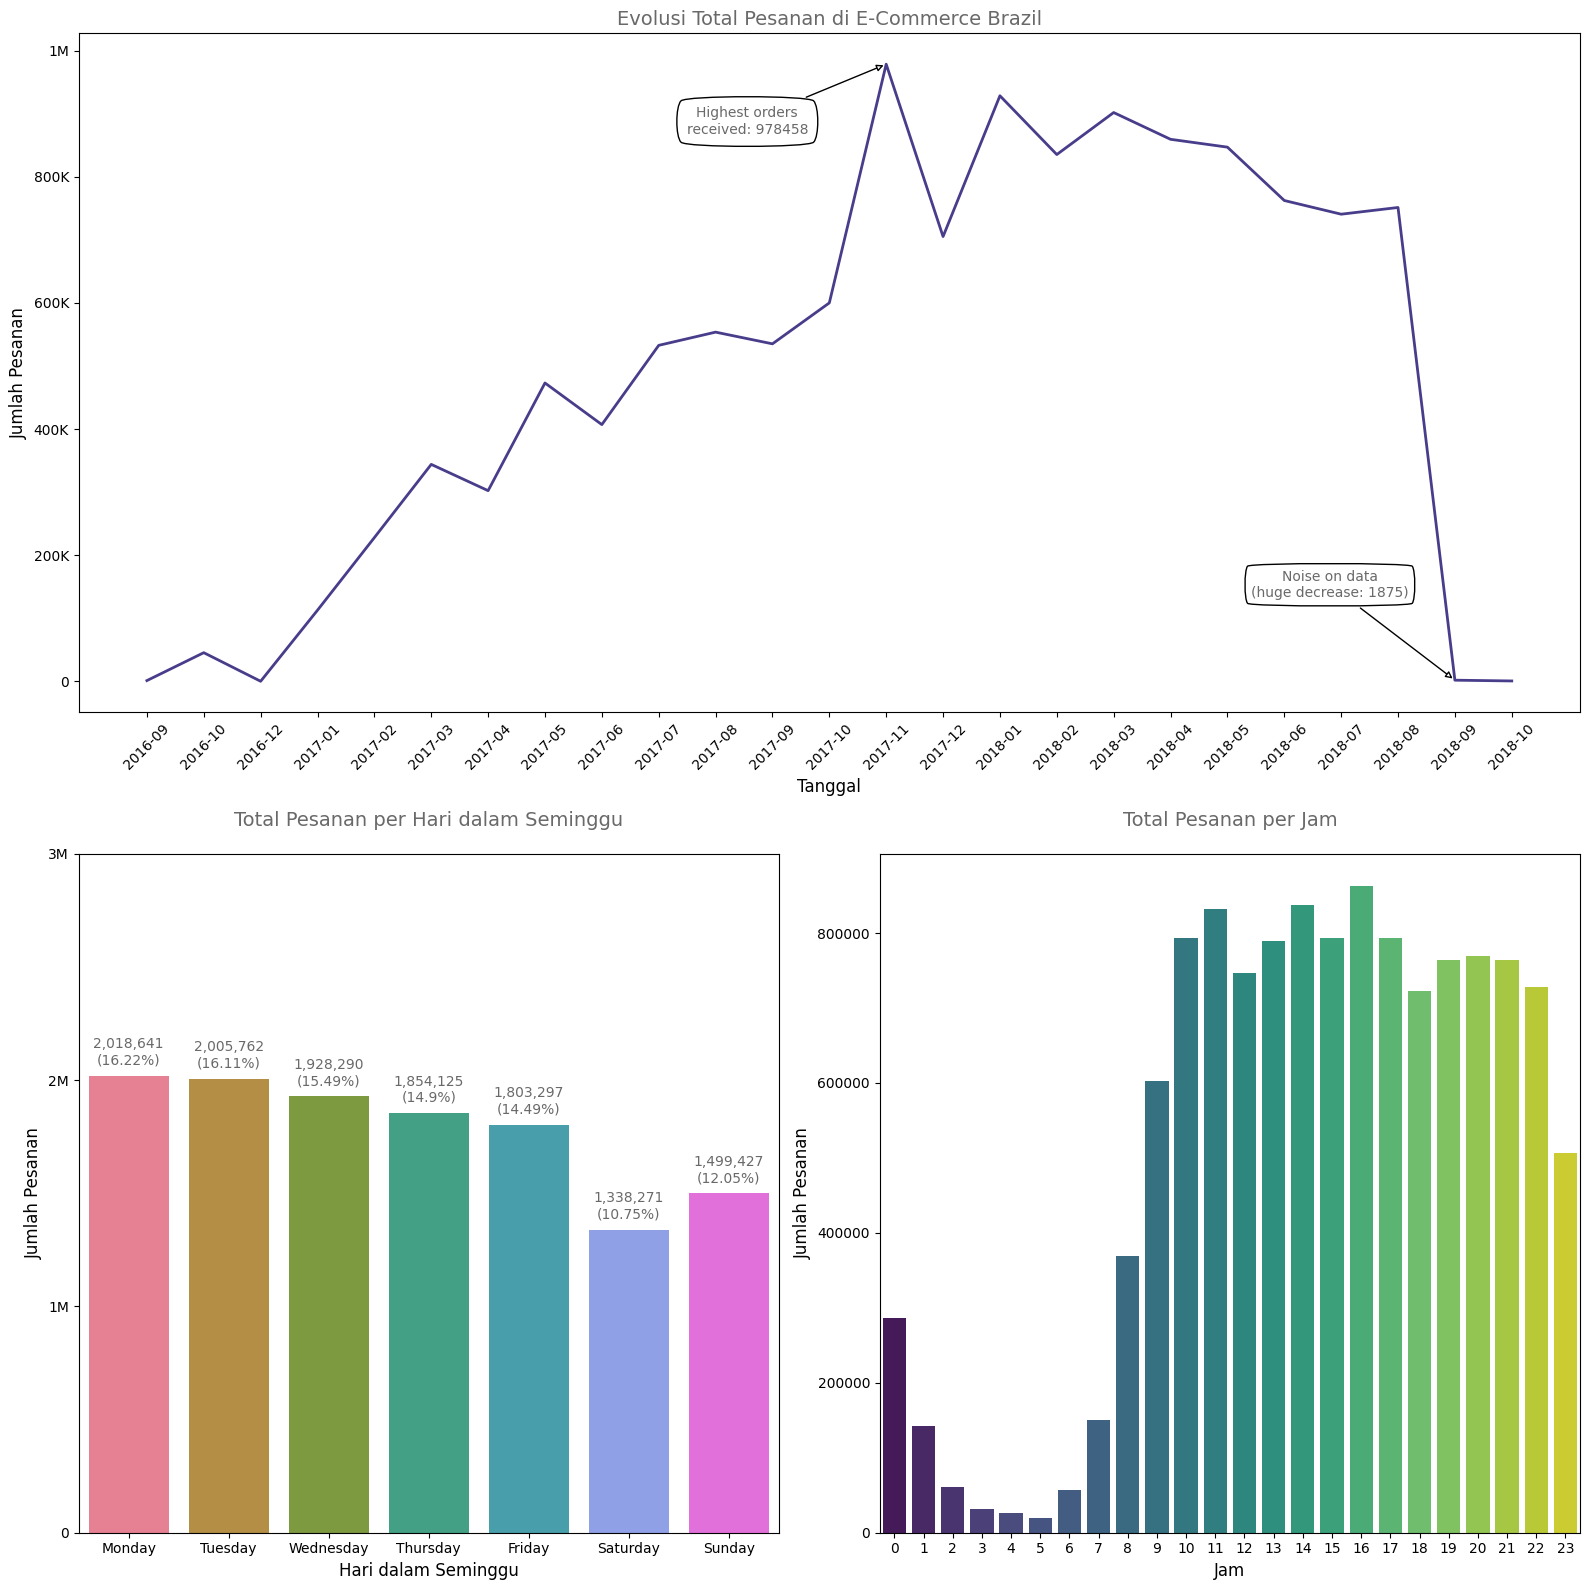

In [8]:
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['year_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')
merged_df['day_of_week'] = merged_df['order_purchase_timestamp'].dt.day_name()
merged_df['hour'] = merged_df['order_purchase_timestamp'].dt.hour

# Membuat figure dengan GridSpec
fig = plt.figure(constrained_layout=True, figsize=(16, 16))
gs = gridspec.GridSpec(2, 2, figure=fig)

# Axis definition
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time
monthly_orders = merged_df['year_month'].value_counts().sort_index()
monthly_orders_df = monthly_orders.reset_index()
monthly_orders_df.columns = ['year_month', 'count']
monthly_orders_df['year_month'] = monthly_orders_df['year_month'].astype(str)

sns.lineplot(data=monthly_orders_df, x='year_month', y='count', ax=ax1, color='darkslateblue', linewidth=2)
highest_order_month = monthly_orders_df.loc[monthly_orders_df['count'].idxmax()]
# Menghitung penurunan terbesar dengan perhitungan
monthly_orders_df['diff'] = monthly_orders_df['count'].diff().abs()
max_decrease_month = monthly_orders_df.loc[monthly_orders_df['diff'].idxmax()]

ax1.annotate(f'Highest orders\nreceived: {highest_order_month["count"]}', 
             xy=(highest_order_month['year_month'], highest_order_month['count']),
             xytext=(-100, -50), textcoords='offset points',
             bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')

ax1.annotate(f'Noise on data\n(huge decrease: {max_decrease_month["count"]})', 
             xy=(max_decrease_month['year_month'], max_decrease_month['count']),
             xytext=(-90, 60), textcoords='offset points',
             bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')

# Menyesuaikan skala sumbu y
ax1.set_title('Evolusi Total Pesanan di E-Commerce Brazil', size=14, color='dimgrey')
ax1.set_xlabel('Tanggal', size=12)
ax1.set_ylabel('Jumlah Pesanan', size=12)
ax1.tick_params(axis='x', rotation=45)

# Mengatur skala sumbu y pada kelipatan 200 ribu
ax1.set_yticks(range(0, int(monthly_orders_df['count'].max()) + 200000, 200000))
# Mengatur format sumbu y
def format_y_axis(value, tick_number):
    if value >= 1e6:
        return f'{int(value / 1e6):,}M'
    elif value >= 1e3:
        return f'{int(value / 1e3):,}K'
    else:
        return int(value)

ax1.get_yaxis().set_major_formatter(FuncFormatter(format_y_axis))

# Barchart - Total of orders by day of week
order_counts_by_day = merged_df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
total_orders = order_counts_by_day.sum()
order_counts_by_day_percent = (order_counts_by_day / total_orders * 100).round(2)

# Plot bar chart
colors = sns.color_palette('husl', n_colors=len(order_counts_by_day))
sns.barplot(x=order_counts_by_day.index, y=order_counts_by_day.values, ax=ax2, palette=colors)
ax2.set_title('Total Pesanan per Hari dalam Seminggu', size=14, color='dimgrey', pad=20)
ax2.set_xlabel('Hari dalam Seminggu', size=12)
ax2.set_ylabel('Jumlah Pesanan', size=12)

# Menambahkan label jumlah dan persentase pada grafik
for i, (count, percent) in enumerate(zip(order_counts_by_day, order_counts_by_day_percent)):
    ax2.text(i, count + 50000, f'{count:,}\n({percent}%)', ha='center', color='dimgrey')

# Mengatur skala sumbu y pada grafik jumlah pesanan per hari dalam seminggu
max_order_count = int(order_counts_by_day.max())
ax2.set_yticks(range(0, max_order_count + 1000000, 1000000))

def format_y_axis_day(value, tick_number):
    if value >= 1e6:
        return f'{int(value / 1e6):,}M'
    elif value >= 1e3:
        return f'{int(value / 1e3):,}K'
    else:
        return int(value)

ax2.get_yaxis().set_major_formatter(FuncFormatter(format_y_axis_day))

# Barchart - Total of orders by time of the day
hourly_order_counts = merged_df['hour'].value_counts().sort_index()
colors = sns.color_palette('viridis', n_colors=len(hourly_order_counts))
sns.barplot(x=hourly_order_counts.index, y=hourly_order_counts.values, ax=ax3, palette=colors)
ax3.set_title('Total Pesanan per Jam', size=14, color='dimgrey', pad=20)
ax3.set_xlabel('Jam', size=12)
ax3.set_ylabel('Jumlah Pesanan', size=12)
ax3.set_xticks(range(0, 24, 1))

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, kita dapat menyimpulkan:

* E-commerce di Brazil menunjukkan tren pertumbuhan yang signifikan dari waktu ke waktu. Meskipun terdapat beberapa periode dengan lonjakan pesanan pada bulan-bulan tertentu, secara keseluruhan terlihat bahwa belanja online semakin populer di kalangan konsumen.

* Hari Senin dan Selasa merupakan hari favorit bagi pelanggan Brazil, dengan lonjakan pembelian yang paling tinggi terjadi pada hari tersebut. Selain itu, pembelian cenderung meningkat pada sore hari.

* terdapat penurunan signifikan pada Agustus 2018 ke bulan September 2018, ini kemungkinan terdapat kesalahan dalam pengambilan data atau memang terdapat masalah yang belum diketahui pada periode tersebut

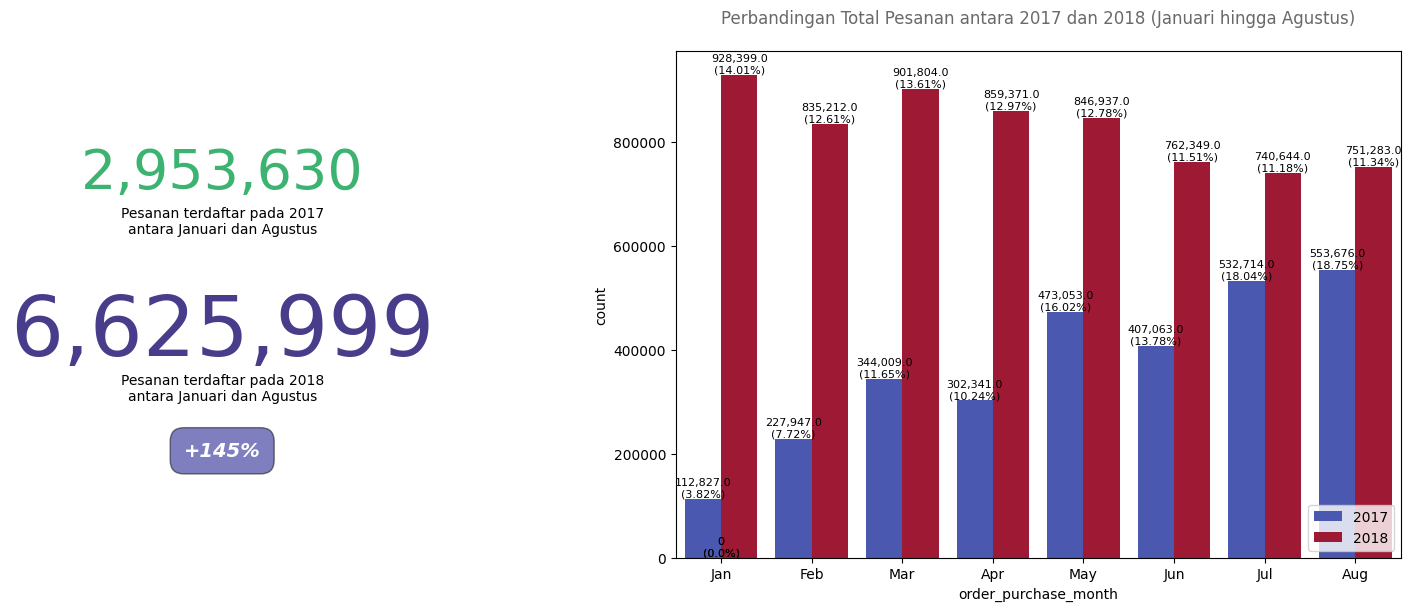

In [9]:
# Menyiapkan data
df_orders_compare = merged_df.query('order_purchase_timestamp.dt.year in (2017, 2018) & order_purchase_timestamp.dt.month <= 8').copy()
df_orders_compare.loc[:, 'order_purchase_year'] = df_orders_compare['order_purchase_timestamp'].dt.year
df_orders_compare.loc[:, 'order_purchase_month'] = df_orders_compare['order_purchase_timestamp'].dt.month

# Menghitung jumlah pesanan per tahun
year_orders = df_orders_compare['order_purchase_year'].value_counts().sort_index()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))

# Membuat figure
fig = plt.figure(constrained_layout=True, figsize=(14, 6))
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Perbandingan pesanan antara 2017 dan 2018
ax1.text(0.00, 0.73, f'{year_orders[2017]:,}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.00, 0.64, 'Pesanan terdaftar pada 2017\nantara Januari dan Agustus', fontsize=10, ha='center')
ax1.text(0.00, 0.40, f'{year_orders[2018]:,}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.00, 0.31, 'Pesanan terdaftar pada 2018\nantara Januari dan Agustus', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.00, 0.20, f'{signal}{growth}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Perbandingan pesanan bulanan antara 2017 dan 2018
plot = sns.countplot(x='order_purchase_month', hue='order_purchase_year', data=df_orders_compare, ax=ax2, palette='coolwarm')

# Mengatur label bulan
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
#ax2.set_xticks(range(8))  # Mengatur lokasi ticks
ax2.set_xticklabels(month_label)  # Mengatur label ticks
ax2.set_title('Perbandingan Total Pesanan antara 2017 dan 2018 (Januari hingga Agustus)', size=12, color='dimgrey', pad=20)
plt.legend(loc='lower right')

# Menghitung total pesanan per tahun untuk persentase
total_orders_2017 = df_orders_compare[df_orders_compare['order_purchase_year'] == 2017].shape[0]
total_orders_2018 = df_orders_compare[df_orders_compare['order_purchase_year'] == 2018].shape[0]

# Menambahkan keterangan jumlah dan persentase pada tiap bar
for p in plot.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = height
    
    # Menentukan tahun bar tersebut
    year = p.get_facecolor()[0]  # 0 untuk mengambil warna dari palet
    if year == plot.patches[0].get_facecolor()[0]:  # Bandingkan dengan warna bar pertama (tahun 2017)
        total_orders_year = total_orders_2017
    else:
        total_orders_year = total_orders_2018
    
    # Menghitung persentase
    percentage = round((height / total_orders_year) * 100, 2)
    
    # Menambahkan teks ke bar
    ax2.text(x, y, f'{height:,}\n({percentage}%)', ha='center', va='bottom', fontsize=8, color='black')

plt.show()

## Eksplorasi Geolocation Pelanggan E-Commerce

In [10]:
# Memilih kolom yang diperlukan untuk mengurangi penggunaan memori
df_orders = pd.merge(orders, customers, on='customer_id', how='left')

# Mengubah tipe data untuk kolom tanggal
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])

# Ekstraksi atribut dari tanggal pembelian - Tahun dan Bulan
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Ekstraksi atribut dari tanggal pembelian - Hari dan Hari dalam Minggu
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Ekstraksi atribut dari tanggal pembelian - Jam dan Waktu dalam Hari
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dini Hari', 'Pagi', 'Siang', 'Malam']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)
df_orders_items = df_orders.merge(order_items, how='left', on='order_id')

# Menggunakan API untuk mendapatkan informasi wilayah
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

# Menyaring geolokasi di luar peta Brasil
geo_prep = geolocation[geolocation.geolocation_lat <= 5.27438888]
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

# Menggabungkan semua informasi
df_orders_items = df_orders_items.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_orders_items = df_orders_items.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
df_orders_items.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13  af07308b275d755c9edb36a90c618231   
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix  ... freight_value  id  sigla  \
0                      3149  ...          8.72  35     SP   
1                     47813  ...         22.76  29     BA   
2                     75265  ...         19.22  52     GO   
3                     59296  ...         27.20  24     RN   
4                      9195  ...          8.72  35     SP   

                  nome   nome_regiao geolocation_zip_code_prefix  \
0            São Paulo       Sudeste                      3149.0   
1                Bahia      Nordeste                     47813.0   
2                Goiás  Centro-Oeste                     75265.0   
3  Rio Grande do Norte      Nordeste                     59296.0   
4            São Paulo       Sudeste                      9195.0   

  geolocation_lat  geolocation_lng         geolocation_city geolocation_state  
0      -23.583885       -46.587473                sao paulo                SP  
1      -12.945892       -45.016313                barreiras                BA  
2      -16.752735       -48.522139               vianopolis                GO  
3       -5.778488       -35.281450  sao goncalo do amarante                RN  
4      -23.760018       -46.524784              santo andre                SP  

[5 rows x 37 columns]

In [11]:
df_orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  object        
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   customer_unique_id             113425 non-null  object        
 9   customer_zip_code_prefix       113425 non-null  int64         
 10  customer_city                  113425 non-null  object        
 11  

In [12]:
# Menyaring data antara Januari 2017 dan Agustus 2018
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

# Mengelompokkan data berdasarkan wilayah
df_regions_group = df_orders_filt.groupby(by=['order_purchase_year_month', 'nome_regiao'], as_index=False)
df_regions_group = df_regions_group.agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by='order_purchase_year_month')
df_regions_group.columns = ['bulan', 'wilayah', 'jumlah_pesanan', 'total_pesanan']
df_regions_group.reset_index(drop=True, inplace=True)

# Mengelompokkan data berdasarkan kota (top 10)
df_cities_group = df_orders_filt.groupby(by='geolocation_city', 
                                       as_index=False).count().loc[:, ['geolocation_city', 'order_id']]
df_cities_group = df_cities_group.sort_values(by='order_id', ascending=False).reset_index(drop=True)
df_cities_group = df_cities_group.iloc[:10, :]

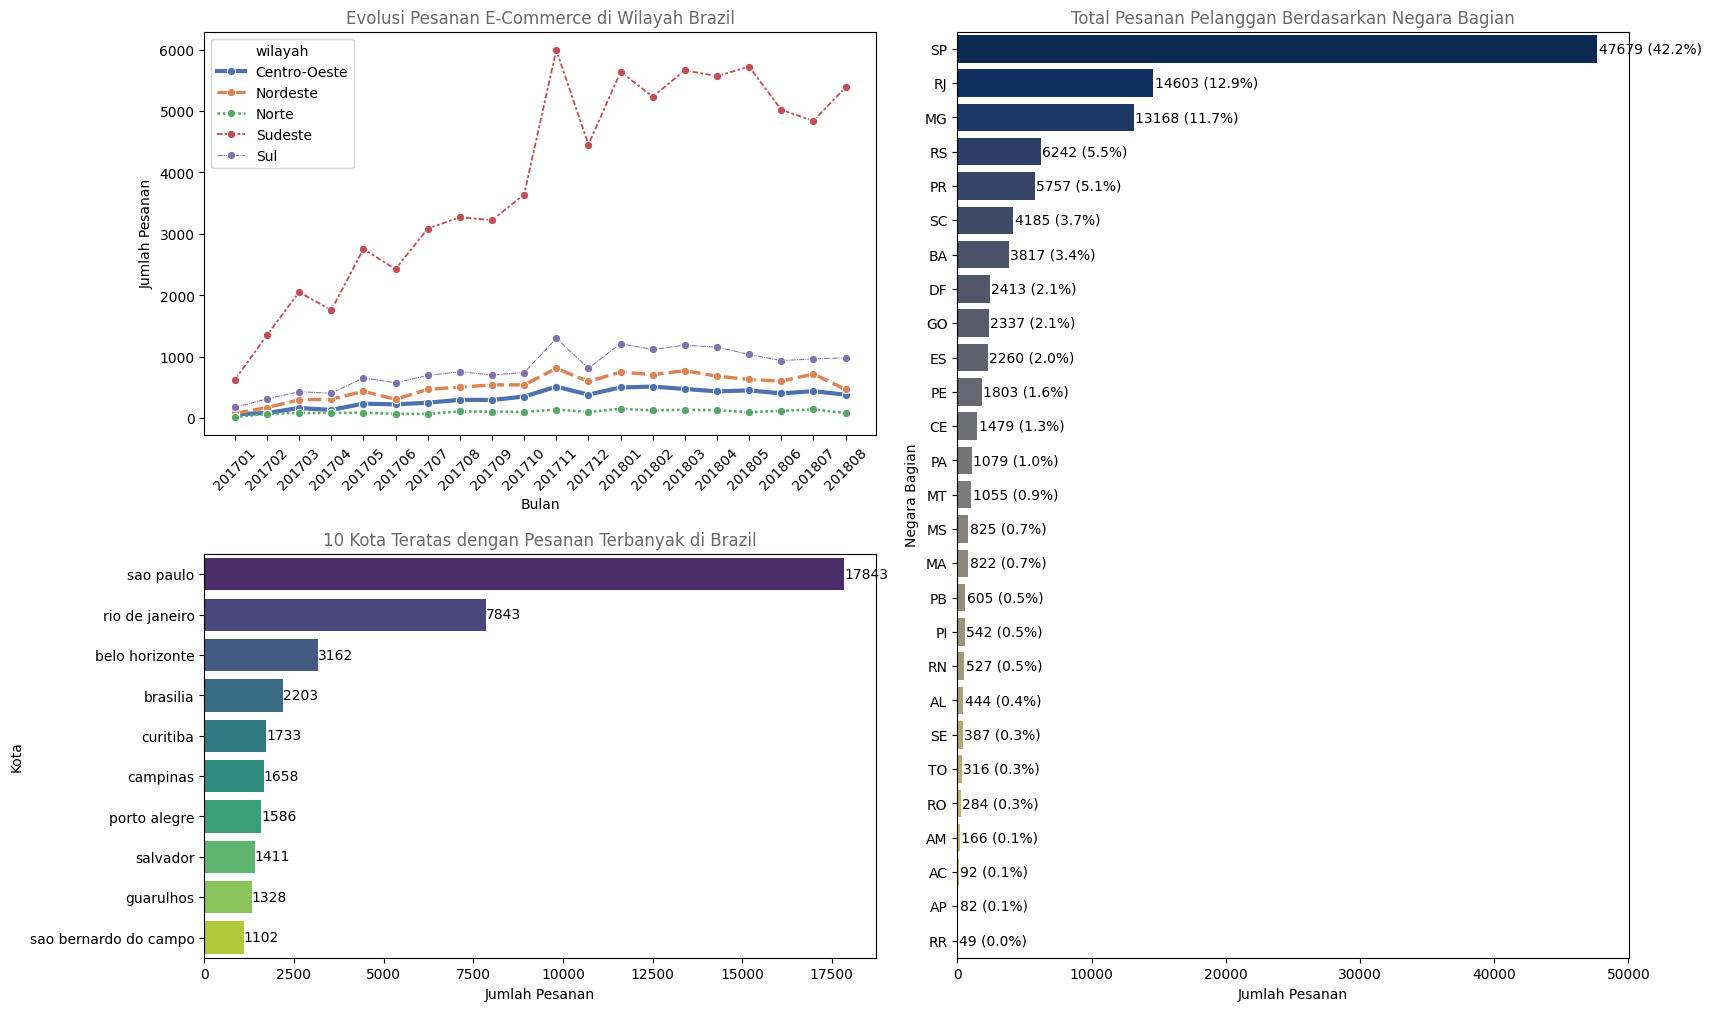

In [13]:
# Membuat dan menyiapkan figure dan axis
fig = plt.figure(constrained_layout=True, figsize=(17, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

# Jumlah pesanan berdasarkan wilayah
sns.lineplot(x='bulan', y='jumlah_pesanan', ax=ax1, data=df_regions_group, hue='wilayah', 
             size='wilayah', style='wilayah', palette='deep', markers=['o'] * 5)
ax1.set_title('Evolusi Pesanan E-Commerce di Wilayah Brazil', size=12, color='dimgrey')
ax1.set_ylabel('Jumlah Pesanan')
ax1.set_xlabel('Bulan')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Top 10 kota dengan pesanan terbanyak di Brazil
barplot_ax2 = sns.barplot(y='geolocation_city', x='order_id', data=df_cities_group, ax=ax2, palette='viridis')
ax2.set_title('10 Kota Teratas dengan Pesanan Terbanyak di Brazil', size=12, color='dimgrey')
ax2.set_xlabel('Jumlah Pesanan')
ax2.set_ylabel('Kota')

# Menambahkan anotasi jumlah pesanan pada tiap batang
for index, value in enumerate(df_cities_group['order_id']):
    ax2.text(value, index, f'{value}', color='black', ha="left", va="center", size=10)

# Mengurutkan data berdasarkan jumlah pesanan terbanyak
df_orders_sorted = df_orders_filt['customer_state'].value_counts().reset_index()
df_orders_sorted.columns = ['customer_state', 'order_count']

# Total pesanan berdasarkan negara bagian, diurutkan dari terbanyak hingga tersedikit
countplot_ax3 = sns.barplot(y='customer_state', x='order_count', data=df_orders_sorted, palette='cividis')
ax3.set_title('Total Pesanan Pelanggan Berdasarkan Negara Bagian', size=12, color='dimgrey')
ax3.set_xlabel('Jumlah Pesanan')
ax3.set_ylabel('Negara Bagian')

# Menambahkan anotasi jumlah pesanan dan persentase pada tiap batang
total_orders = df_orders_sorted['order_count'].sum()

for index, row in df_orders_sorted.iterrows():
    count = row['order_count']
    percentage = 100 * count / total_orders
    ax3.text(count + 100, index, f'{count} ({percentage:.1f}%)', ha='left', va='center', size=10, color='black')

plt.show()

Grafik di atas mengindikasikan bahwa pertumbuhan pesanan di wilayah tenggara Brazil (sudeste) mengalami peningkatan yang sangat signifikan dibandingkan dengan wilayah lainnya. Selain itu, grafik lainnya menunjukkan bahwa kota dengan jumlah pesanan e-commerce terbanyak adalah São Paulo.

In [14]:
# Mengambil dan memfilter data untuk tahun 2018
filtered_data = df_orders_items.query('order_purchase_year == 2018').dropna(subset=['geolocation_lat', 'geolocation_lng'])

# Sampling data untuk FastMarkerCluster (misalnya, 50.000 titik)
sampled_data = filtered_data.sample(n=50000, random_state=42)

# Zipping locations untuk FastMarkerCluster
locations = list(zip(sampled_data['geolocation_lat'], sampled_data['geolocation_lng']))

# Membuat peta dasar
base_map = folium.Map(location=[-15, -50], zoom_start=4.0)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(base_map)

# Membuat data untuk HeatMap
heat_data = filtered_data.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).size()
heat_data_list = heat_data[['geolocation_lat', 'geolocation_lng', 'size']].values.tolist()

# Menambahkan HeatMap sebagai layer terpisah
heat_map = folium.Map(location=[-15, -50], zoom_start=4.0, tiles='cartodbdark_matter')
HeatMap(
    name='HeatMap',
    data=heat_data_list,
    radius=10,
    blur=8,
    max_zoom=13,
    min_opacity=0.3
).add_to(heat_map)
folium.LayerControl().add_to(heat_map)

# Menyimpan Map dalam bentuk HTML
#base_map.save('FastMarkerCluster_map.html')
#heat_map.save('HeatMap_map.html')

In [15]:
base_map

In [16]:
heat_map

Berdasarkan peta yang ditampilkan di atas, kita dapat melihat bahwa wilayah tenggara Brazil memiliki jumlah pesanan e-commerce tertinggi. Terlebih lagi, area São Paulo menunjukkan kepadatan pesanan yang paling tinggi, yang terlihat dari warna yang paling intens pada heatmap.

## Ekspolrasi Penjualan E-commerce

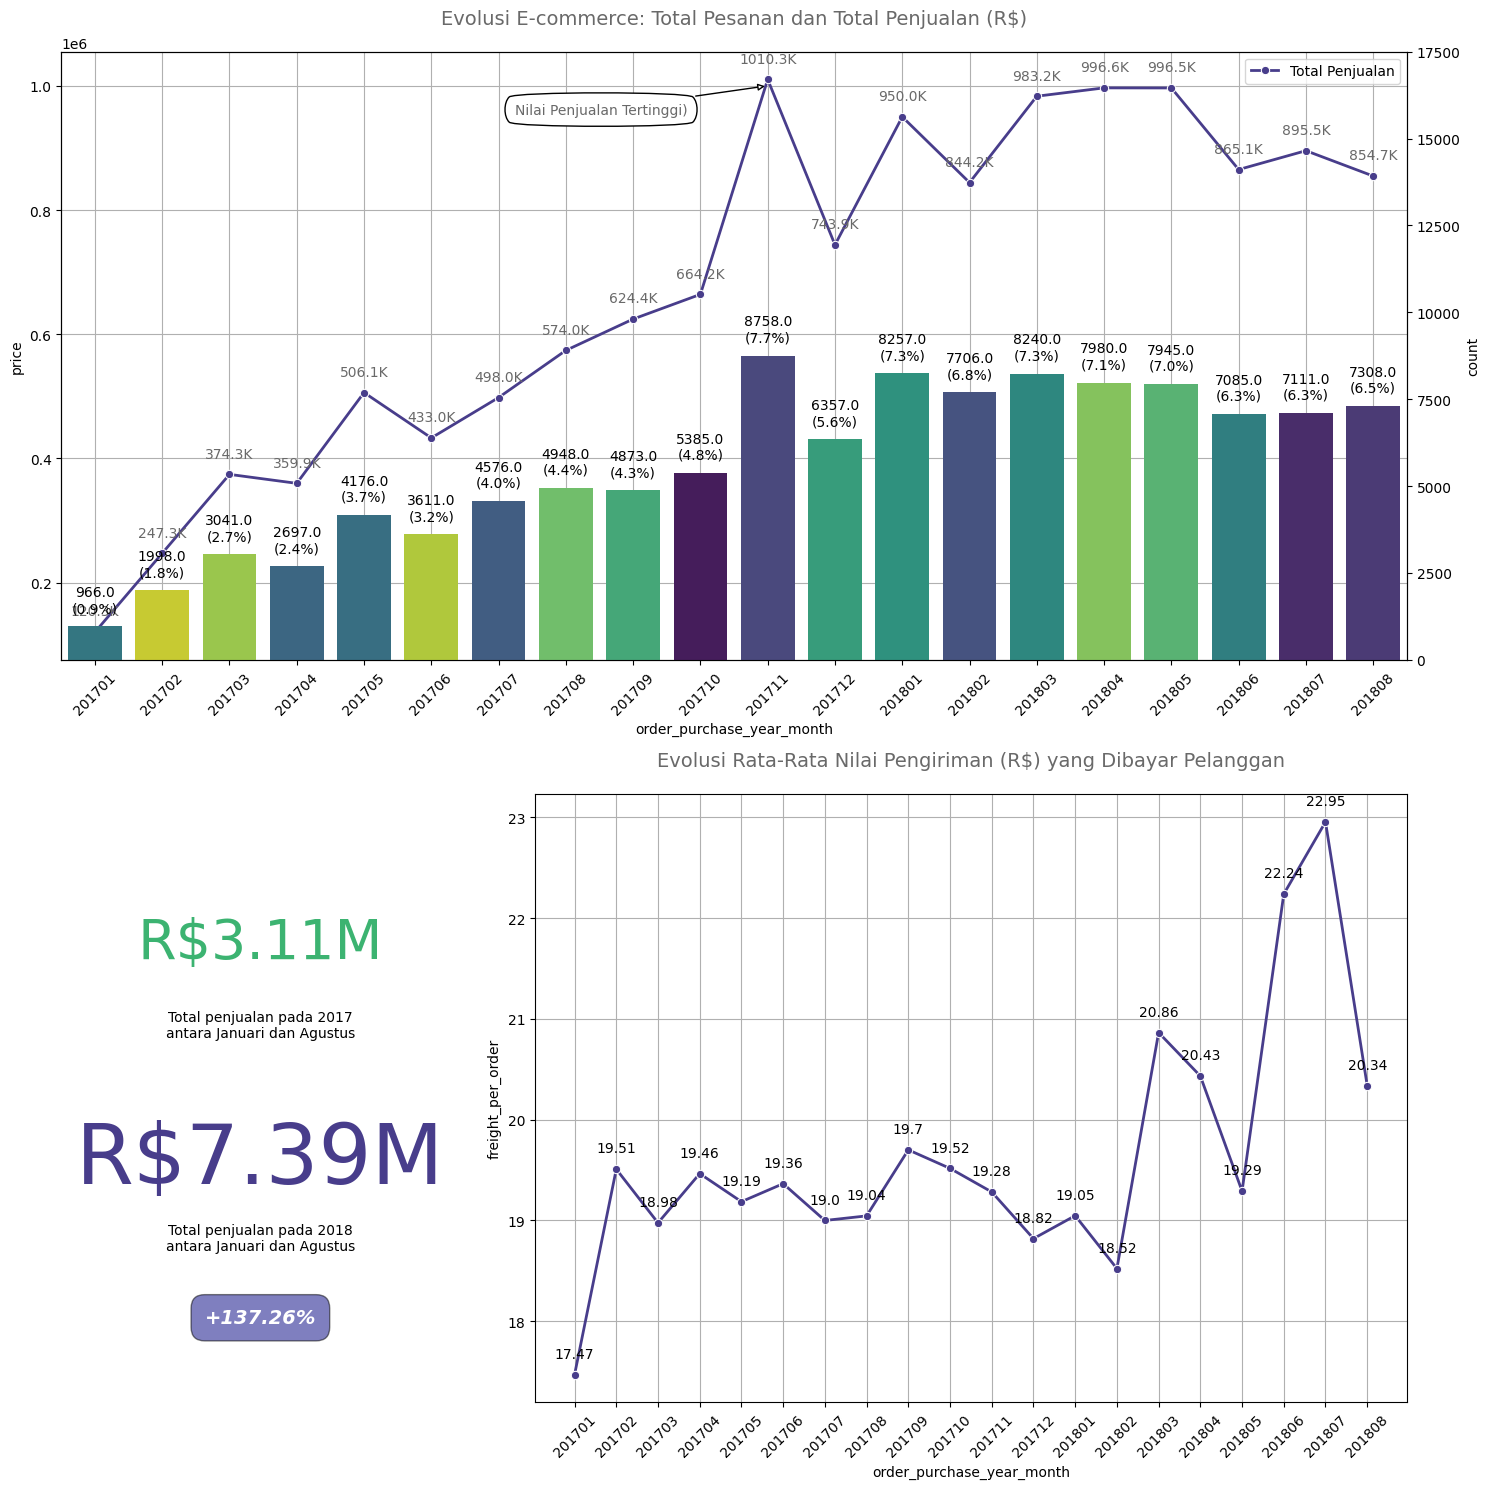

In [17]:
# Pengelompokan Data
df_month_aggreg = df_orders_filt.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False)
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
})

# Penambahan Kolom Baru untuk Analisis
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']

# Membuat Figur
fig = plt.figure(constrained_layout=True, figsize=(15, 15))

# Definisi Sumbu
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1:])

# Grafik 1 - Evolusi Total Pesanan dan Total Penjualan di E-commerce
sns.lineplot(x='order_purchase_year_month', y='price', ax=ax1, data=df_month_aggreg, linewidth=2, 
             color='darkslateblue', marker='o', label='Total Penjualan')
ax1_twx = ax1.twinx()
bar_plot = sns.countplot(x='order_purchase_year_month', data=df_orders_filt, ax=ax1_twx, palette='viridis')
ax1_twx.set_yticks(np.arange(0, 20000, 2500))

# Kustomisasi Grafik Pertama
ax1.set_title('Evolusi E-commerce: Total Pesanan dan Total Penjualan (R$)', size=14, color='dimgrey', pad=20)
ax1.grid(True)
ax1_twx.grid(False)

# Memutar label sumbu x untuk meningkatkan keterbacaan
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Menambahkan anotasi pada grafik 1
for x, y in df_month_aggreg.price.items():
    ax1.annotate(str(round(y/1000, 1))+'K', xy=(x, y), textcoords='offset points', xytext=(0, 12),
                ha='center', color='dimgrey')

# Menambahkan label pada bar chart
total_orders = len(df_orders_filt)
for patch in bar_plot.patches:
    height = patch.get_height()
    percentage = (height / total_orders) * 100
    ax1_twx.annotate(f'{height}\n({percentage:.1f}%)', 
                      xy=(patch.get_x() + patch.get_width() / 2, height),
                      xytext=(0, 10), 
                      textcoords='offset points', 
                      ha='center', 
                      color='black')

ax1.annotate(f'Nilai Penjualan Tertinggi)', (10, 1000000), xytext=(-120, -20), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')

# Grafik 2 - Perbandingan Penjualan Tahun 2017 dan 2018
month_comparison = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708',
                    '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808']
df_sales_compare = df_month_aggreg.query('order_purchase_year_month in @month_comparison')
sold_2017 = df_sales_compare.query('order_purchase_year == 2017')['price'].sum()
sold_2018 = df_sales_compare.query('order_purchase_year == 2018')['price'].sum()
growth = (sold_2018 - sold_2017) / sold_2017 * 100
ax2.text(0.50, 0.73, 'R$' + str(round(sold_2017/1000000, 2)) + 'M', fontsize=40, color='mediumseagreen', ha='center')
ax2.text(0.50, 0.60, 'Total penjualan pada 2017\nantara Januari dan Agustus', fontsize=10, ha='center')
ax2.text(0.50, 0.36, 'R$' + str(round(sold_2018/1000000, 2)) + 'M', fontsize=60, color='darkslateblue', ha='center')
ax2.text(0.50, 0.25, 'Total penjualan pada 2018\nantara Januari dan Agustus', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax2.text(0.50, 0.13, f'{signal}{str(round(growth, 2))}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax2.axis('off')

# Grafik 3 - Evolusi Rata-Rata Nilai Pengiriman yang Dibayar Pelanggan
sns.lineplot(x='order_purchase_year_month', y='freight_per_order', data=df_month_aggreg, linewidth=2, 
             color='darkslateblue', marker='o', ax=ax3)
ax3.grid(True)

# Memutar label sumbu x untuk meningkatkan keterbacaan
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

# Menambahkan anotasi pada grafik 3
for x, y in df_month_aggreg.freight_per_order.items():
    ax3.annotate(round(y, 2), xy=(x, y), textcoords='offset points', xytext=(0, 12),
                ha='center', color='black')
ax3.set_title('Evolusi Rata-Rata Nilai Pengiriman (R$) yang Dibayar Pelanggan', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan bahwa total pesanan dan penjualan mengalami pertumbuhan yang signifikan dari tahun 2017 hingga pertengahan 2018. Pada bulan November 2017, terdapat puncak penjualan tertinggi dengan nilai mencapai R 1010.3K. Selama periode ini, penjualan meningkat sebesar +137.26% dari tahun 2017 ke 2018. Grafik juga menunjukkan fluktuasi dalam biaya pengiriman yang dibayar oleh pelanggan, dengan nilai tertinggi tercatat pada bulan July 2018, yaitu sekitar R 22.95 per pesanan. Setelah mencapai puncaknya pada July 2018, biaya pengiriman mengalami penurunan, tetapi tetap lebih tinggi dibandingkan dengan periode awal tahun 2017.

Secara keseluruhan, kedua grafik menunjukkan bahwa e-commerce mengalami pertumbuhan yang positif baik dalam hal jumlah pesanan maupun total penjualan. Namun, terdapat variasi dalam biaya pengiriman, yang mungkin dipengaruhi oleh faktor eksternal atau strategi bisnis tertentu. Peningkatan yang signifikan dalam total penjualan dari 2017 hingga 2018 juga tercermin dalam kenaikan biaya pengiriman yang ditanggung oleh pelanggan.

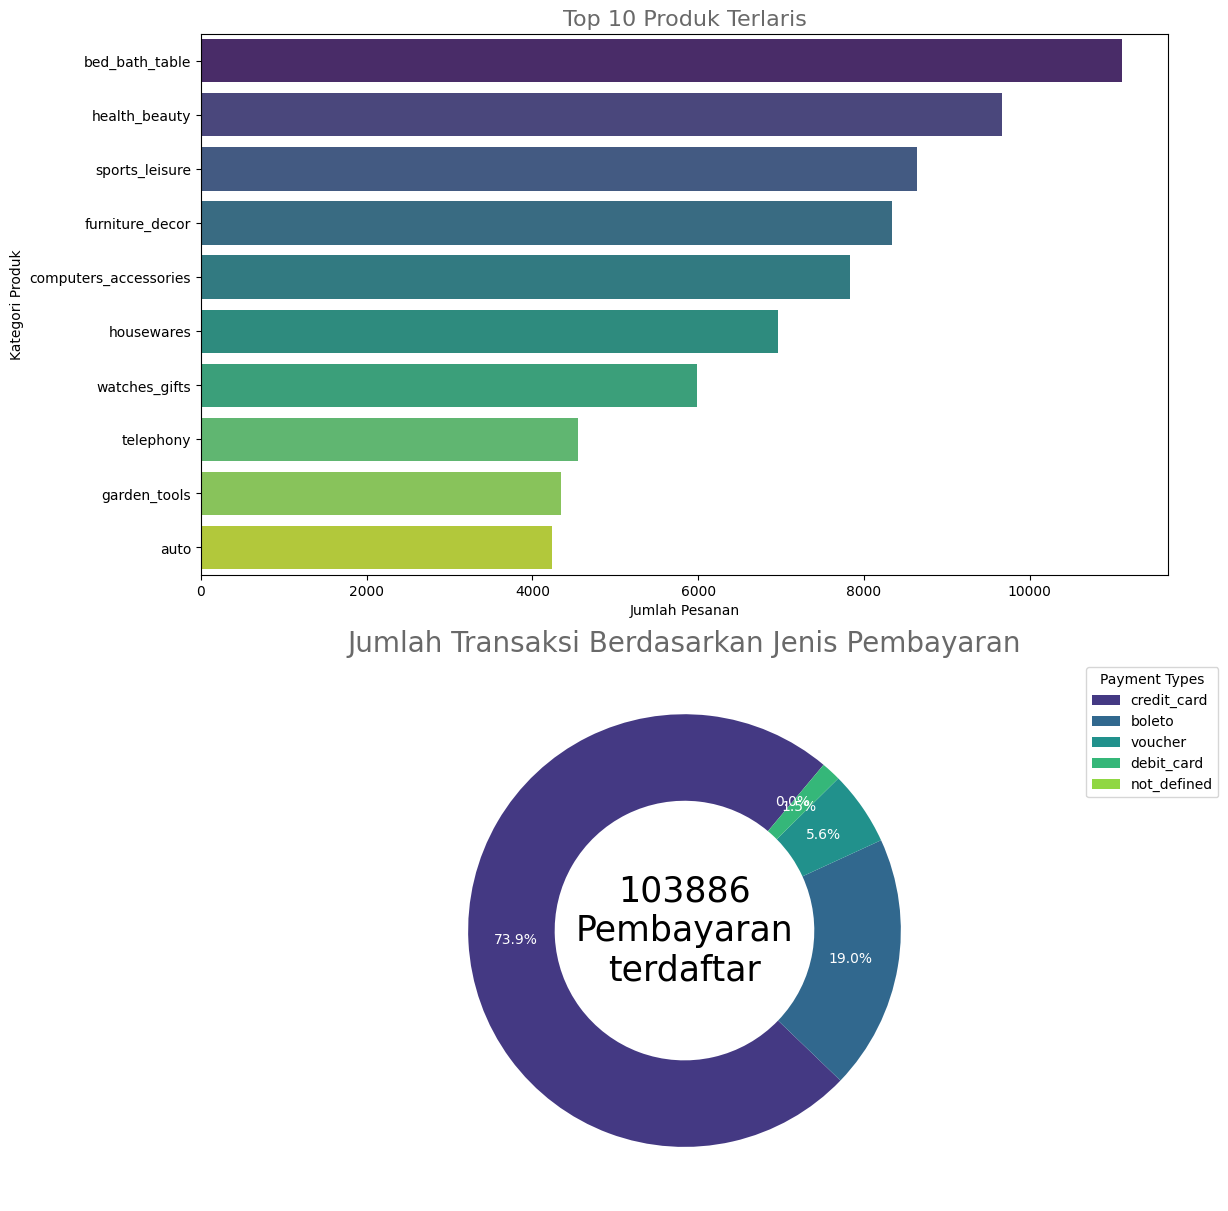

In [18]:
# Menggabungkan order_items dengan products untuk mendapatkan kategori produk
order_items_products = order_items.merge(products[['product_id', 'product_category_name']], on='product_id')

# Menggabungkan dengan product_category untuk mendapatkan nama kategori dalam bahasa Inggris
order_items_products = order_items_products.merge(product_category[['product_category_name', 'product_category_name_english']], on='product_category_name')

# Hitung jumlah pesanan untuk setiap kategori produk
top_categories = order_items_products.groupby('product_category_name_english').size().reset_index(name='order_count')

# Mengambil 10 kategori dengan jumlah pesanan terbanyak
top_10_categories = top_categories.sort_values(by='order_count', ascending=False).head(10)

# Hitung jumlah pesanan untuk setiap metode pembayaran
payment_methods = order_payments['payment_type'].value_counts().reset_index(name='order_count')
payment_methods.columns = ['payment_type', 'order_count']

# Fungsi untuk membuat donut plot
def donut_plot(df, col, ax, label_names, colors, title, text):
    sizes = df[col].value_counts()
    wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=50, wedgeprops=dict(width=0.4))
    
    # Tambahkan lingkaran di tengah donut plot
    centre_circle = plt.Circle((0, 0), 0.2, fc='white')
    ax.add_artist(centre_circle)
    
    # Tambahkan legend
    ax.legend(wedges, label_names, title="Payment Types", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
    
    # Tambahkan jumlah total pembayaran yang terdaftar di tengah donut
    total_payments = sizes.sum()
    ax.text(0, 0, text, ha='center', va='center', fontsize=25, color='black')
    
    # Sesuaikan ukuran teks pada donut plot
    for autotext in autotexts:
        autotext.set_color('white')
        # Menggeser posisi teks persentase
        x, y = autotext.get_position()
        autotext.set_position((x * 1.3, y * 1.3)) 
    
    ax.set_title(title, size=20, color='dimgrey')

# Membuat figur
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), constrained_layout=True)

# Kategori produk terlaris
sns.barplot(x='order_count', y='product_category_name_english', data=top_10_categories, palette='viridis', ax=ax1)
ax1.set_title('Top 10 Produk Terlaris', size=16, color='dimgrey')
ax1.set_xlabel('Jumlah Pesanan')
ax1.set_ylabel('Kategori Produk')

# Donut Plot untuk Payment Favorit Customer
colors = sns.color_palette('viridis', len(payment_methods))
label_names = payment_methods['payment_type']
donut_plot(order_payments, 'payment_type', ax2, label_names=label_names, colors=colors,
           title='Jumlah Transaksi Berdasarkan Jenis Pembayaran', text=f'{len(order_payments)}\nPembayaran\nterdaftar')

plt.show()

Grafik di atas menunjukkan bahwa kategori produk "bed_bath_table" adalah yang paling populer dengan lebih dari 10.000 pesanan, diikuti oleh kategori "health_beauty" yang mencatat lebih dari 8.000 pesanan. Dalam hal metode pembayaran, data menunjukkan bahwa pelanggan di Brazil lebih cenderung menggunakan kartu kredit, yang mencakup 73,9% dari total transaksi. Boleto yang merupakan metode pembayaran lokal, adalah yang kedua terbanyak dengan 19,0% transaksi. Voucher dan kartu debit masing-masing menyumbang 5,6% dan 0,9% dari total transaksi, sedangkan 0,6% transaksi menggunakan metode pembayaran yang tidak terdefinisi.

Berdasarkan temuan ini, e-commerce dapat memfokuskan upaya pemasaran pada kategori "bed_bath_table" dan "health_beauty" untuk memaksimalkan potensi penjualan. Kategori seperti "auto", "garden_tool", dan "telephony" memerlukan strategi pemasaran tambahan untuk meningkatkan daya tarik mereka, mengingat selisih pesanan yang signifikan dibandingkan dengan kategori yang lebih populer. Selain itu, untuk meningkatkan pengalaman pelanggan, penting untuk terus mendukung metode pembayaran yang paling populer seperti kartu kredit dan Boleto, sambil menjajaki cara untuk meningkatkan adopsi metode pembayaran yang kurang umum.

## Eksplorasi Review Customer (NLP)

In [19]:
# Membuat Dataset Review Customer
df_comments = order_reviews.loc[:, [ 'review_comment_message','review_score']]
df_comments = df_comments.dropna(subset=['review_comment_message'])
df_comments = df_comments.reset_index(drop=True)
print(f'Dataset shape: {df_comments.shape}')
df_comments.columns = ['comment', 'score']
df_comments.head()

Dataset shape: (40977, 2)


comment  score
0              Recebi bem antes do prazo estipulado.      5
1  Parabéns lojas lannister adorei comprar pela I...      5
2  aparelho eficiente. no site a marca do aparelh...      4
3    Mas um pouco ,travando...pelo valor ta Boa.\r\n      4
4  Vendedor confiável, produto ok e entrega antes...      5

### Preprocessing Text

#### Preprocessing with Regex

In [20]:
# Preprocessing Text Komentar Review Pelanggan

def find_patterns(re_pattern, text_list):
    p = re.compile(re_pattern)
    positions_dict = {}
    for i, c in enumerate(text_list):
        match_list = []
        for match in p.finditer(c):
            match_list.append(match.span())
        if match_list:
            positions_dict[f'Text idx {i}'] = match_list
    return positions_dict

def print_step_result(text_list_before, text_list_after, idx_list):
    for i, idx in enumerate(idx_list):
        print(f'\n--- Contoh {i + 1} Text setelah Preprocessing ---\n')
        print(f'Sebelum: \n{text_list_before[idx]}\n')
        print(f'Sesudah: \n{text_list_after[idx]}\n')

def re_breakline(text_list):
    return [re.sub(r'[\n\r]+', ' ', text) for text in text_list]

def re_hiperlinks(text_list):
    # Applying regex
    pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', text) for text in text_list]

def re_dates(text_list):
    # Applying regex
    pattern = r'([0-2][0-9]|(3)[0-1])([/\.])((0[1-9]|1[0-2])([/\.])\d{2,4})'
    return [re.sub(pattern, ' data ', text) for text in text_list]

def re_money(text_list):
    # Applying regex
    pattern = r'[R]{0,1}\$[ ]{0,}\d+(?:,|\.)\d+'
    return [re.sub(pattern, ' dinheiro ', text) for text in text_list]

def re_numbers(text_list):
    # Applying regex
    return [re.sub(r'[0-9]+', ' numero ', text) for text in text_list]

def re_negation(text_list):
    # Applying regex
    return [re.sub(r'([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', text) for text in text_list]

def re_special_chars(text_list):
    # Applying regex
    return [re.sub(r'\W', ' ', text) for text in text_list]

def re_whitespaces(text_list):
    # Applying regex
    white_spaces = [re.sub(r'\s+', ' ', text) for text in text_list]
    white_spaces_end = [re.sub(r'[ \t]+$', '', text) for text in white_spaces]
    return white_spaces_end

In [21]:
# Creating a list of comment reviews
reviews = list(df_comments['comment'].values)

# Menerapkan RegEx
reviews_breakline = re_breakline(reviews)
df_comments['re_breakline'] = reviews_breakline

# Memverifikasi hasil
print_step_result(reviews, reviews_breakline, idx_list=[45, 48])


--- Contoh 1 Text setelah Preprocessing ---

Sebelum: 
Este foi o pedido
Balde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE)
Vendido e entregue targaryen
Tapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG

Sesudah: 
Este foi o pedido Balde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE) Vendido e entregue targaryen Tapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG


--- Contoh 2 Text setelah Preprocessing ---

Sebelum: 
Estava faltando apenas um produto, eu recebi hoje , muito obrigada!
Tudo certo!

Att 

Elenice.

Sesudah: 
Estava faltando apenas um produto, eu recebi hoje , muito obrigada! Tudo certo! Att  Elenice.



In [22]:
# Menerapkan RegEx Link
reviews_hiperlinks = re_hiperlinks(reviews_breakline)
df_comments['re_hiperlinks'] = reviews_hiperlinks

# Memverifikasi hasil
print_step_result(reviews_breakline, reviews_hiperlinks, idx_list= [10607])


--- Contoh 1 Text setelah Preprocessing ---

Sebelum: 
comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto http://prntscr.com/jkx7hr quando o produto chegou aqui veio todos com a mesma cor, tabaco http://prntscr.com/

Sesudah: 
comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto  link  quando o produto chegou aqui veio todos com a mesma cor, tabaco  link 



In [23]:
# Menerapkan RegEx Tanggal
reviews_dates = re_dates(reviews_hiperlinks)
df_comments['re_dates'] = reviews_dates

# Verifying results
print_step_result(reviews_hiperlinks, reviews_dates, idx_list=[567, 626, 1152])


--- Contoh 1 Text setelah Preprocessing ---

Sebelum: 
ENTREGA MUITO DEMORADA, COMPREI EM 26/03/2018 E ATÉ AGORA NÃO RECEBI OS PRODUTOS

Sesudah: 
ENTREGA MUITO DEMORADA, COMPREI EM  data  E ATÉ AGORA NÃO RECEBI OS PRODUTOS


--- Contoh 2 Text setelah Preprocessing ---

Sebelum: 
ainda nao recebi e a ultima informacao sobre p produto e do dia 08/12/2017.

Sesudah: 
ainda nao recebi e a ultima informacao sobre p produto e do dia  data .


--- Contoh 3 Text setelah Preprocessing ---

Sebelum: 
Eu comprei um celular smartphone , não chegou não recomendo comprar nesta loja targaryen e lannister porque não chegou meu produto. Eu comprei está data,07/06/2017. Era pra chegar no dia .05/07/2017.

Sesudah: 
Eu comprei um celular smartphone , não chegou não recomendo comprar nesta loja targaryen e lannister porque não chegou meu produto. Eu comprei está data, data . Era pra chegar no dia . data .



In [24]:
# Menerapkan RegEx Mata Uang
reviews_money = re_money(reviews_dates)
df_comments['re_money'] = reviews_money

# Verifying results
print_step_result(reviews_dates, reviews_money, idx_list=[45, 2386, 7831])


--- Contoh 1 Text setelah Preprocessing ---

Sebelum: 
Este foi o pedido Balde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE) Vendido e entregue targaryen Tapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG

Sesudah: 
Este foi o pedido Balde Com 128 Peças - Blocos De Montar 2 un -  dinheiro  cada (NÃO FOI ENTREGUE) Vendido e entregue targaryen Tapete de Eva Nº Letras 36 Peças Crianças 1 un -  dinheiro  (ESTE FOI ENTREG


--- Contoh 2 Text setelah Preprocessing ---

Sebelum: 
Relógio belíssimo, muito elegante, inacreditável diante do valor de menos de R$ 150,00! Veio muito bem embrulhado e protegido, fora que tem também caixa muito chique, como se fosse jóia!!! Recomendo

Sesudah: 
Relógio belíssimo, muito elegante, inacreditável diante do valor de menos de  dinheiro ! Veio muito bem embrulhado e protegido, fora que tem também caixa muito chique, como se fosse jóia!!! Recomendo


--- Contoh 3 Text setelah Preprocessing ---

Sebelum: 
Ped

In [25]:
# Applying RegEx
reviews_numbers = re_numbers(reviews_money)
df_comments['re_numbers'] = reviews_numbers

# Verifying results
print_step_result(reviews_money, reviews_numbers, idx_list=[7831])


--- Contoh 1 Text setelah Preprocessing ---

Sebelum: 
Pedi HD 500 GB SATA Notebook Samsung R520 1 unidade -  dinheiro  cada   E recebi Hdd 2,5 Notebook / Desktop Seagate St500lm030 Barracuda 500gb 5400rpm 128mb Sata 6gb/s

Sesudah: 
Pedi HD  numero  GB SATA Notebook Samsung R numero   numero  unidade -  dinheiro  cada   E recebi Hdd  numero , numero  Notebook / Desktop Seagate St numero lm numero  Barracuda  numero gb  numero rpm  numero mb Sata  numero gb/s



In [26]:
# Applying RegEx
reviews_negation = re_negation(reviews_numbers)
df_comments['re_negation'] = reviews_negation

# Verifying results
print_step_result(reviews_numbers, reviews_negation, idx_list=[11, 12, 29])


--- Contoh 1 Text setelah Preprocessing ---

Sebelum: 
Não gostei ! Comprei gato por lebre

Sesudah: 
 negação  gostei ! Comprei gato por lebre


--- Contoh 2 Text setelah Preprocessing ---

Sebelum: 
Sempre compro pela Internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. No stark o prazo máximo já se esgotou e ainda não recebi o produto.

Sesudah: 
Sempre compro pela Internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. No stark o prazo máximo já se esgotou e ainda  negação  recebi o produto.


--- Contoh 3 Text setelah Preprocessing ---

Sebelum: 
O produto não chegou no prazo estipulado e causou transtorno, pq programei a viagem de férias do meu filho, baseado no prazo. Moro na Bahia e ele em Cuiabá sozinho. Agora, a casa está vazia. 

Sesudah: 
O produto  negação  chegou no prazo estipulado e causou transtorno, pq programei a viagem de férias do meu filho, baseado no prazo. Moro na Bahia e ele em Cuiabá sozinho. Ag

In [27]:
# Applying RegEx
reviews_special_chars = re_special_chars(reviews_negation)
df_comments['re_special_chars'] = reviews_special_chars

# Verifying results
print_step_result(reviews_negation, reviews_special_chars, idx_list=[45, 48, 29])


--- Contoh 1 Text setelah Preprocessing ---

Sebelum: 
Este foi o pedido Balde Com  numero  Peças - Blocos De Montar  numero  un -  dinheiro  cada ( negação  FOI ENTREGUE) Vendido e entregue targaryen Tapete de Eva Nº Letras  numero  Peças Crianças  numero  un -  dinheiro  (ESTE FOI ENTREG

Sesudah: 
Este foi o pedido Balde Com  numero  Peças   Blocos De Montar  numero  un    dinheiro  cada   negação  FOI ENTREGUE  Vendido e entregue targaryen Tapete de Eva Nº Letras  numero  Peças Crianças  numero  un    dinheiro   ESTE FOI ENTREG


--- Contoh 2 Text setelah Preprocessing ---

Sebelum: 
Estava faltando apenas um produto, eu recebi hoje , muito obrigada! Tudo certo! Att  Elenice.

Sesudah: 
Estava faltando apenas um produto  eu recebi hoje   muito obrigada  Tudo certo  Att  Elenice 


--- Contoh 3 Text setelah Preprocessing ---

Sebelum: 
O produto  negação  chegou no prazo estipulado e causou transtorno, pq programei a viagem de férias do meu filho, baseado no prazo. Moro na Bahia e 

In [28]:
# Applying RegEx
reviews_whitespaces = re_whitespaces(reviews_special_chars)
df_comments['re_whitespaces'] = reviews_whitespaces

# Verifying results
print_step_result(reviews_special_chars, reviews_whitespaces, idx_list=[7831, 48, -1])


--- Contoh 1 Text setelah Preprocessing ---

Sebelum: 
Pedi HD  numero  GB SATA Notebook Samsung R numero   numero  unidade    dinheiro  cada   E recebi Hdd  numero   numero  Notebook   Desktop Seagate St numero lm numero  Barracuda  numero gb  numero rpm  numero mb Sata  numero gb s

Sesudah: 
Pedi HD numero GB SATA Notebook Samsung R numero numero unidade dinheiro cada E recebi Hdd numero numero Notebook Desktop Seagate St numero lm numero Barracuda numero gb numero rpm numero mb Sata numero gb s


--- Contoh 2 Text setelah Preprocessing ---

Sebelum: 
Estava faltando apenas um produto  eu recebi hoje   muito obrigada  Tudo certo  Att  Elenice 

Sesudah: 
Estava faltando apenas um produto eu recebi hoje muito obrigada Tudo certo Att Elenice


--- Contoh 3 Text setelah Preprocessing ---

Sebelum: 
meu produto chegou e ja tenho que devolver  pois está com defeito    negação  segurar carga

Sesudah: 
meu produto chegou e ja tenho que devolver pois está com defeito negação segurar carga

#### Preprocessing with StopWord & Stemming

In [29]:
pt_stopwords = stopwords.words('portuguese')
print(f'Total daftar stopwords untuk bahasa Portugis di nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:10]

Total daftar stopwords untuk bahasa Portugis di nltk.corpous module: 207


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [30]:
#Mendefinisikan fungsi untuk menghapus stopwords
def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [31]:
# Menghapus stopword dan melihat beberapa contoh
reviews_stopwords = [' '.join(stopwords_removal(review)) for review in reviews_whitespaces]
df_comments['stopwords_removed'] = reviews_stopwords

print_step_result(reviews_whitespaces, reviews_stopwords, idx_list=[12, 45, 500])


--- Contoh 1 Text setelah Preprocessing ---

Sebelum: 
Sempre compro pela Internet e a entrega ocorre antes do prazo combinado que acredito ser o prazo máximo No stark o prazo máximo já se esgotou e ainda negação recebi o produto

Sesudah: 
sempre compro internet entrega ocorre antes prazo combinado acredito prazo máximo stark prazo máximo esgotou ainda negação recebi produto


--- Contoh 2 Text setelah Preprocessing ---

Sebelum: 
Este foi o pedido Balde Com numero Peças Blocos De Montar numero un dinheiro cada negação FOI ENTREGUE Vendido e entregue targaryen Tapete de Eva Nº Letras numero Peças Crianças numero un dinheiro ESTE FOI ENTREG

Sesudah: 
pedido balde numero peças blocos montar numero un dinheiro cada negação entregue vendido entregue targaryen tapete eva nº letras numero peças crianças numero un dinheiro entreg


--- Contoh 3 Text setelah Preprocessing ---

Sebelum: 
Chegou um pouco antes do prazo isso é bom

Sesudah: 
chegou pouco antes prazo bom



In [32]:
# Defining a function to remove the stopwords and to lower the comments
def stemming_process(text, stemmer=RSLPStemmer()):
    return [stemmer.stem(c) for c in text.split()]

In [33]:
# Applying stemming and looking at some examples
reviews_stemmer = [' '.join(stemming_process(review)) for review in reviews_stopwords]
df_comments['stemming'] = reviews_stemmer

print_step_result(reviews_stopwords, reviews_stemmer, idx_list=[0, 500, -1])


--- Contoh 1 Text setelah Preprocessing ---

Sebelum: 
recebi bem antes prazo estipulado

Sesudah: 
receb bem ant praz estipul


--- Contoh 2 Text setelah Preprocessing ---

Sebelum: 
chegou pouco antes prazo bom

Sesudah: 
cheg pouc ant praz bom


--- Contoh 3 Text setelah Preprocessing ---

Sebelum: 
produto chegou ja devolver pois defeito negação segurar carga

Sesudah: 
produt cheg ja devolv poi defeit neg segur carg



### Labelling

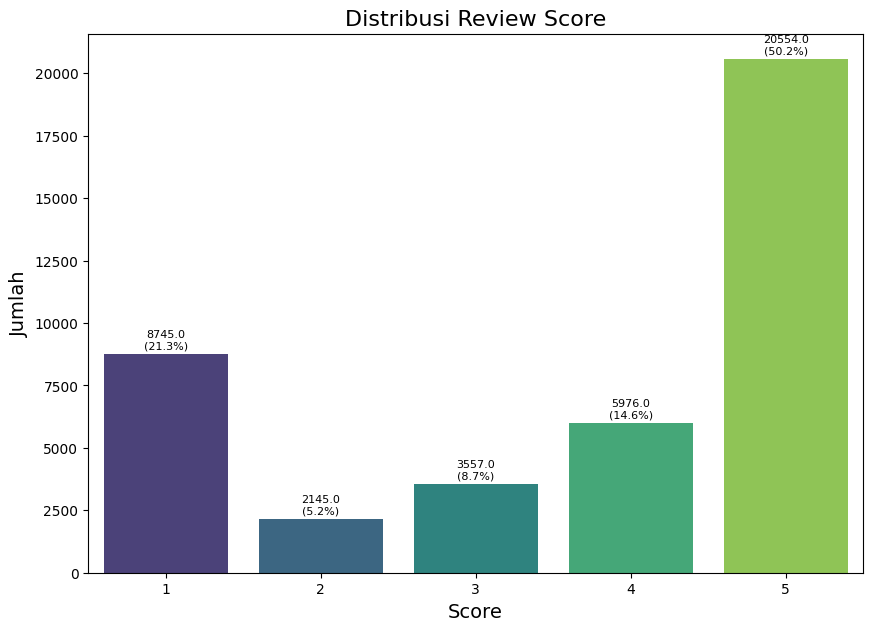

In [34]:
# Jumlah review tiap score
fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(x='score', data=df_comments, ax=ax, palette='viridis')

# Menambahkan judul dan label sumbu
ax.set_title('Distribusi Review Score', fontsize=16)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Jumlah', fontsize=14)

# Menambahkan anotasi jumlah dan persentase di tiap bar
total = len(df_comments)  
for p in ax.patches:
    count = p.get_height()  
    percentage = 100 * count / total 
    ax.annotate(f'{count}\n({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Menampilkan plot
plt.show()

Dari grafik di atas, dapat dilihat bahwa mayoritas komentar yang diterima oleh platform e-commerce memiliki rating yang tinggi. Komentar dengan rating 5, yang menunjukkan kepuasan maksimal, memiliki jumlah terbanyak dengan total 20.554 komentar. Ini menunjukkan bahwa banyak pelanggan merasa sangat puas dengan produk atau layanan yang mereka terima.

Sebaliknya, komentar dengan rating 1, yang menunjukkan ketidakpuasan maksimal, jumlahnya jauh lebih sedikit, yaitu sebanyak 8.745 komentar. Meskipun jumlahnya lebih rendah dibandingkan dengan rating 5, jumlah komentar dengan rating rendah ini tetap penting untuk diperhatikan karena dapat memberikan wawasan tentang area yang perlu diperbaiki.

Dengan kata lain, meskipun mayoritas umpan balik positif, adanya jumlah komentar dengan rating rendah menunjukkan bahwa masih ada sejumlah pelanggan yang tidak puas dan hal ini perlu ditangani untuk meningkatkan pengalaman pelanggan secara keseluruhan.

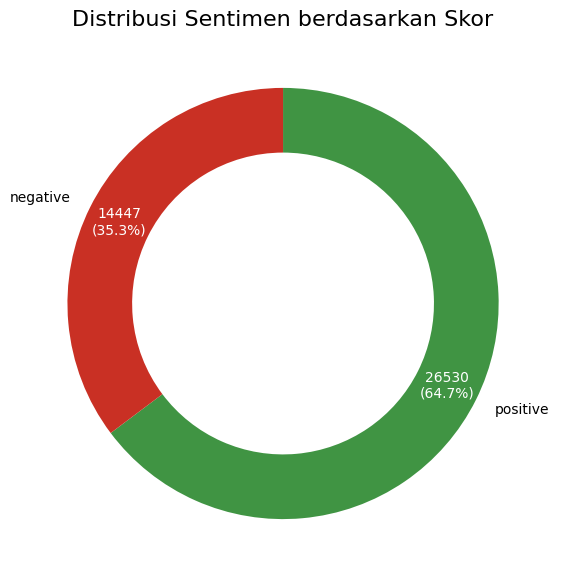

In [35]:
# Mengelompokkan dan melabeli data
score_map = {
    1: 'negative',
    2: 'negative',
    3: 'negative',
    4: 'positive',
    5: 'positive'
}
df_comments['sentiment_label'] = df_comments['score'].map(score_map)

# Membuat plot donat
fig, ax = plt.subplots(figsize=(10, 7))

# Menghitung jumlah tiap label sentimen
sentiment_counts = df_comments['sentiment_label'].value_counts()

# Warna untuk masing-masing kategori
colors = ['#409443', '#c93024'] if 'negative' in sentiment_counts.index else ['darkslateblue', 'crimson']

# Membuat plot donat
wedges, texts = ax.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, startangle=90, counterclock=False, 
                       wedgeprops=dict(width=0.3))

# Menambahkan anotasi untuk jumlah dan persentase
for i, (wedge, count, label) in enumerate(zip(wedges, sentiment_counts, sentiment_counts.index)):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Menghitung sudut tengah setiap segmen
    x = 0.85 * np.cos(np.radians(angle))  # Posisi X untuk anotasi
    y = 0.85 * np.sin(np.radians(angle))  # Posisi Y untuk anotasi
    percentage = 100 * count / sentiment_counts.sum()
    ax.annotate(f'{count}\n({percentage:.1f}%)',
                xy=(x, y), 
                ha='center', va='center', fontsize=10, color='White')

# Menambahkan judul (opsional)
ax.set_title('Distribusi Sentimen berdasarkan Skor', fontsize=16)

# Menampilkan plot
plt.show()

In [36]:
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=stopwords.words('portuguese')):
    # Menggunakan CountVectorizer untuk membuat sekumpulan kata menggunakan korpus yang diberikan
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

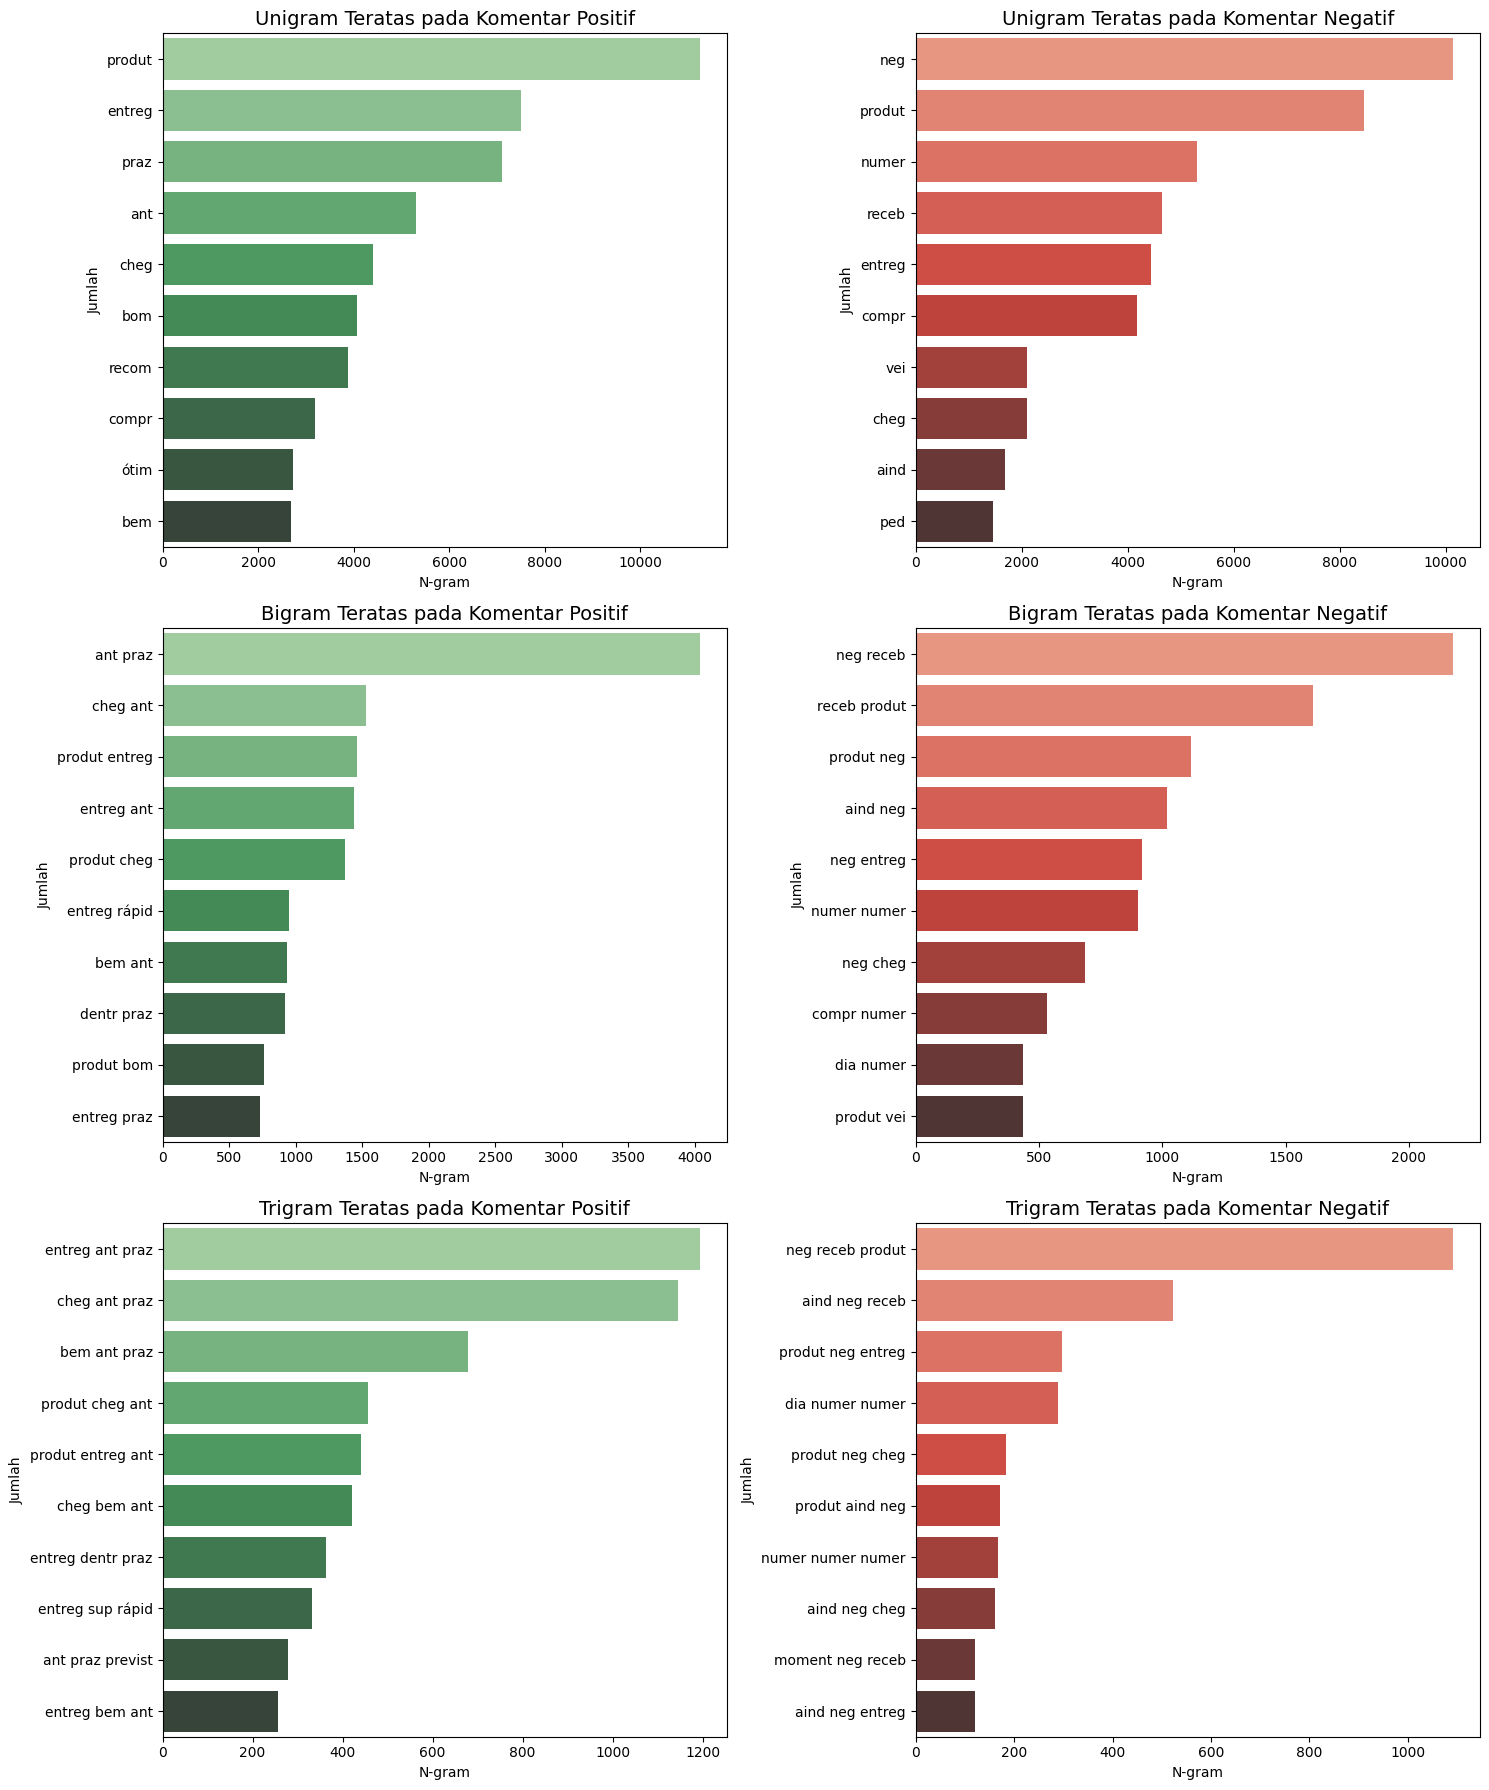

In [37]:
# Membagi korpus menjadi komentar positif dan negatif
positive_comments = df_comments.query('sentiment_label == "positive"')['stemming']
negative_comments = df_comments.query('sentiment_label == "negative"')['stemming']

# Mengambil 10 unigram teratas berdasarkan sentimen
unigrams_pos = ngrams_count(positive_comments, (1, 1), 10)
unigrams_neg = ngrams_count(negative_comments, (1, 1), 10)

# Mengambil 10 bigram teratas berdasarkan sentimen
bigrams_pos = ngrams_count(positive_comments, (2, 2), 10)
bigrams_neg = ngrams_count(negative_comments, (2, 2), 10)

# Mengambil 10 trigram teratas berdasarkan sentimen
trigrams_pos = ngrams_count(positive_comments, (3, 3), 10)
trigrams_neg = ngrams_count(negative_comments, (3, 3), 10)

# Menggabungkan semuanya dalam dictionary Python untuk mempermudah plotting
ngram_dict_plot = {
    'Unigram Teratas pada Komentar Positif': unigrams_pos,
    'Unigram Teratas pada Komentar Negatif': unigrams_neg,
    'Bigram Teratas pada Komentar Positif': bigrams_pos,
    'Bigram Teratas pada Komentar Negatif': bigrams_neg,
    'Trigram Teratas pada Komentar Positif': trigrams_pos,
    'Trigram Teratas pada Komentar Negatif': trigrams_neg,
}

# Membuat plot analisis n-grams
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
i, j = 0, 0
colors = ['Greens_d', 'Reds_d']
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
    
    # Menyesuaikan plot
    ax.set_title(title, size=14)
    ax.set_ylabel('Jumlah')
    ax.set_xlabel('N-gram')
    
    # Menaikkan indeks
    j += 1
    if j == 2:
        j = 0
        i += 1
plt.tight_layout()
plt.show()

Secara kesrluruhan dapat dilihat bahwa Komentar Positif memiliki fokus utama pelanggan yang puas adalah kecepatan dan ketepatan waktu pengiriman produk. Kata-kata seperti "antes" (sebelum), "prazo" (waktu), dan "entrega" (pengiriman) sering muncul, menunjukkan bahwa pengiriman tepat waktu sangat dihargai. Sedangkan untuk Komentar Negatif Pelanggan yang tidak puas sering menyebutkan pengalaman negatif terkait produk yang diterima dan masalah dengan proses pembelian, terutama dalam hal tenggat waktu dan penerimaan produk. Dari hal ini E-commerce dapat menggunakan wawasan ini untuk meningkatkan aspek-aspek yang sering menjadi sumber kepuasan atau ketidakpuasan pelanggan, seperti pengiriman tepat waktu dan kualitas produk.

### Sentiment Review from Customer

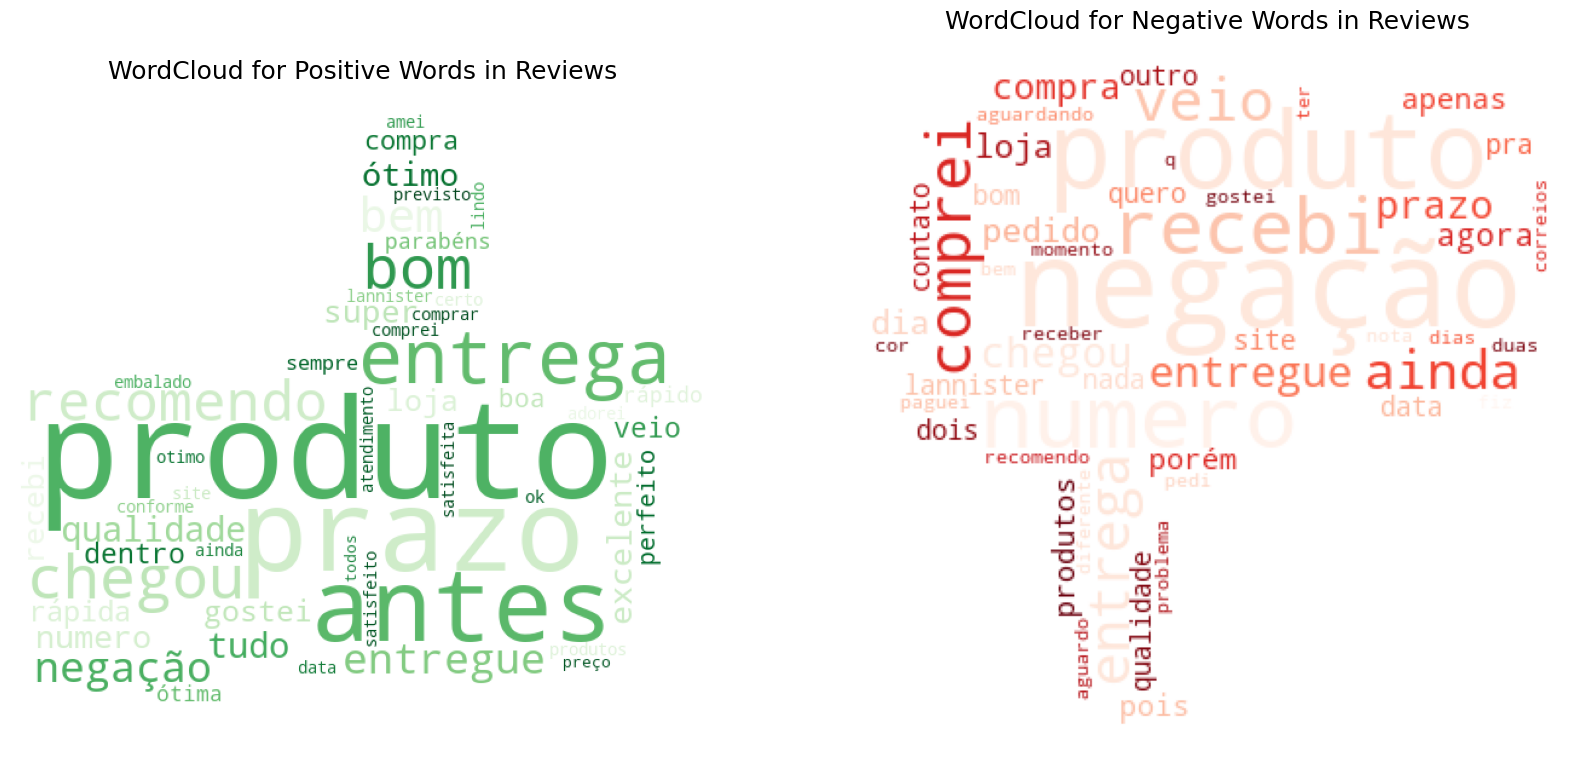

In [38]:
# Membaca dan mempersiapkan masker untuk latar belakang WordCloud
like_mask = np.array(Image.open("./like.png"))  # Ganti dengan path ke masker like
dislike_mask = np.array(Image.open("./dislike.png"))  # Ganti dengan path ke masker dislike

# Mengonversi masker like
transf_like_mask = np.ndarray((like_mask.shape[0], like_mask.shape[1]), np.int32)
for i in range(len(like_mask)):
    transf_like_mask[i] = [255 if px == 0 else 0 for px in like_mask[i]]

# Mengonversi masker dislike
transf_dislike_mask = np.ndarray((dislike_mask.shape[0], dislike_mask.shape[1]), np.int32)
for i in range(len(dislike_mask)):
    transf_dislike_mask[i] = [255 if px == 0 else 0 for px in dislike_mask[i]]
    
# Menghasilkan daftar kata positif dan negatif
pos_comments = list(df_comments.query('sentiment_label == "positive"')['stopwords_removed'].values)
positive_words = ' '.join(pos_comments).split(' ')
neg_comments = list(df_comments.query('sentiment_label == "negative"')['stopwords_removed'].values)
negative_words = ' '.join(neg_comments).split(' ')

# Menggunakan Counter untuk membuat dictionary yang menghitung frekuensi
positive_dict = Counter(positive_words)
negative_dict = Counter(negative_words)

# Membuat WordCloud untuk ulasan positif
positive_wc = WordCloud(
    width=1280, height=720, collocations=False, random_state=42,
    mask=transf_like_mask, colormap='Greens',  # Menggunakan colormap hijau untuk ulasan positif
    background_color='white', max_words=50
).generate_from_frequencies(positive_dict)

# Membuat WordCloud untuk ulasan negatif
negative_wc = WordCloud(
    width=1280, height=720, collocations=False, random_state=42,
    mask=transf_dislike_mask, colormap='Reds',  # Menggunakan colormap merah untuk ulasan negatif
    background_color='white', max_words=50
).generate_from_frequencies(negative_dict)

# Memvisualisasikan WordCloud yang dibuat
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

# Visualisasi WordCloud positif
ax1 = axs[0]
ax1.imshow(positive_wc)
ax1.axis('off')
ax1.set_title('WordCloud for Positive Words in Reviews', size=18, pad=20)

# Visualisasi WordCloud negatif
ax2 = axs[1]
ax2.imshow(negative_wc)
ax2.axis('off')
ax2.set_title('WordCloud for Negative Words in Reviews', size=18, pad=20)

plt.show()

Wordcloud ini menampilkan kata-kata yang paling sering muncul dalam ulasan pelanggan, terbagi menjadi dua kategori, positif dan negatif. Kata-kata utama yang sering muncul pada WordCloud review positve yaitu, "produto" (produk) Produk sering disebut dalam konteks positif, menunjukkan bahwa pelanggan sering merasa puas dengan produk yang mereka beli. "entrega" (pengiriman) Pengiriman juga banyak disebut dengan cara yang positif, mungkin terkait dengan kecepatan atau ketepatan waktu pengiriman. "prazo" (waktu) Kata ini menunjukkan bahwa waktu atau tenggat pengiriman sering disebut secara positif, menunjukkan kepuasan terhadap waktu pengiriman yang dijanjikan. Kata-kata lain seperti "antes" (sebelum), "bom" (baik), "recomendo" (merekomendasikan), "chegou" (telah tiba), "perfeito" (sempurna) juga sering muncul, mencerminkan kepuasan umum terhadap produk, pengiriman, dan layanan.

Pada Wordcloud negatif review sering disebutkan kata-kata seperti, "produto" (produk) Produk juga sering disebut dalam konteks negatif, yang mungkin menunjukkan ketidakpuasan dengan kualitas atau harapan yang tidak terpenuhi. "recebi" (menerima) Ini mungkin terkait dengan pengalaman negatif pelanggan setelah menerima produk, seperti produk yang tidak sesuai harapan atau tidak menerima produk. "compra" (pembelian) dan "comprei" (saya beli) Kata-kata ini menunjukkan bahwa pengalaman pembelian secara umum juga menjadi sumber keluhan. "negacao" (penolakan) Mungkin terkait dengan klaim garansi atau pengembalian dana yang tidak berhasil. Kata-kata lain seperti "entregue" (telah dikirim), "ainda" (masih), "número" (nomor), dan "prazo" (waktu) muncul, mungkin terkait dengan ketidakpuasan terkait pengiriman atau waktu pengiriman yang lebih lama dari yang diharapkan.

Secara keseluruhan Wordcloud positif menunjukkan bahwa pelanggan umumnya puas dengan produk dan layanan, terutama terkait dengan kualitas produk dan ketepatan waktu pengiriman. Wordcloud negatif menunjukkan ada beberapa keluhan yang sering muncul terkait dengan produk yang diterima, pengalaman pembelian, dan mungkin masalah dengan pengiriman atau waktu pengiriman.

# Modelling for Customer Segemntation (RFM)

## RFM

In [39]:
# Menggabungkan data 'orders' dan 'order_items' berdasarkan 'order_id'
order_orderItem = orders.merge(order_items, on='order_id', how='inner')
# Menggabungkan data 'customers' dengan hasil penggabungan sebelumnya berdasarkan 'customer_id'
orders_customers = customers.merge(order_orderItem, on='customer_id', how='inner')
# Mengubah kolom 'order_purchase_timestamp' menjadi format datetime
orders_customers['order_purchase_timestamp'] = pd.to_datetime(orders_customers['order_purchase_timestamp'])
# Mendapatkan tanggal maksimum dari data dengan menambahkan 1 hari sebagai batas waktu
max_date = orders_customers['order_purchase_timestamp'].max() + datetime.timedelta(days=1)

In [40]:
# Menghitung data RFM (Recency, Frequency, Monetary)
rfm_data = orders_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,  # Recency
    'customer_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom menjadi 'customer_id', 'recency', 'frequency', 'monetary'
rfm_data.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

Segmentation calculation:

Perhitungan untuk mengetahui segmentasi pelanggan dilakukan dengan cara merata-ratakan skor F dan M dan nilai R terpisah.

| Segment Name               | Range of R values | Range of F and M Average |
|----------------------------|-------------------|--------------------------|
| Champions                  |       4 - 5       |           4 - 5          |
| Loyal Customers            |       2 - 5       |           3 - 5          |
| Potential Loyalist         |       3 - 5       |           1 - 3          |
| New Customers              |       4 - 5       |           0 - 1          |
| Promising                  |       3 - 4       |           0 - 1          |
| Customers Needing Attetion |       2 - 3       |           2 - 3          |
| About to Sleep             |       2 - 3       |           0 - 2          |
| At Risk                    |       0 - 2       |           2 - 5          |
| Can't Lose Them            |       0 - 1       |           4 - 5          |
| Hibernating                |       1 - 2       |           1 - 2          |
| Lost                       |       0 - 2       |           0 - 2          |

source: [O que é RFM e como aplicá-lo ao seu time de Customer Success](https://medium.com/maxmilhas-tech/o-que-%C3%A9-rfm-e-como-aplic%C3%A1-lo-ao-seu-time-de-customer-service-b9c35817ed01)

In [41]:
# Fungsi untuk melakukan pengelompokan dengan K-Means
def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
    if standard_tranf:
        scaler = StandardScaler()
        data_temp = scaler.fit_transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    cluster_group = data.assign(cluster=kmeans_sel.labels_)
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1], ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1)]
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

In [42]:
# Mengelompokkan data Recency, Frequency, dan Monetary masing-masing dengan K-Means
r_labels = k_means_group(rfm_data[['recency']], 6, 1, asc=True)
f_labels = k_means_group(rfm_data[['frequency']], 6, 1)
m_labels = k_means_group(rfm_data[['monetary']], 6, 1)

# Menambahkan kolom R, F, M ke dalam data RFM
rfm_data = rfm_data.assign(R=r_labels, F=f_labels, M=m_labels)

# Mengurangi nilai R, F, M dengan 1 agar lebih mudah untuk pengelompokan
rfm_data['R'] = rfm_data['R'] - 1
rfm_data['F'] = rfm_data['F'] - 1
rfm_data['M'] = rfm_data['M'] - 1

In [43]:
rfm_data.groupby('R')['recency'].describe()

count        mean        std    min    25%    50%    75%    max
R                                                                   
0  10461.0  525.517350  47.299837  464.0  487.0  520.0  553.0  729.0
1  14134.0  402.087449  33.472730  348.0  373.0  400.0  429.0  463.0
2  17838.0  293.732762  25.952442  250.0  274.0  286.0  315.0  347.0
3  18811.0  205.786402  23.738510  166.0  186.0  206.0  227.0  249.0
4  17260.0  126.896640  21.994995   86.0  111.0  126.0  145.0  165.0
5  16916.0   45.100378  22.259918    1.0   27.0   42.0   65.0   85.0

count    95420.000000
mean       243.600377
std        153.160320
min          1.000000
25%        119.000000
50%        224.000000
75%        353.000000
max        729.000000
Name: recency, dtype: float64


<Axes: xlabel='recency', ylabel='Count'>

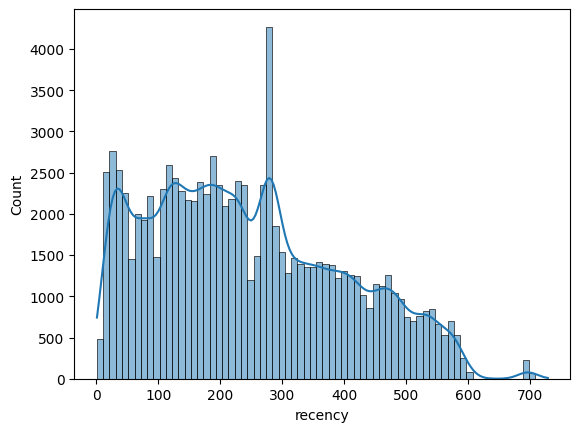

In [44]:
print(rfm_data['recency'].describe())
sns.histplot(x='recency', data=rfm_data, kde=True)

Dapat dilihat bahwa 25% pelanggan memiliki recency sebesar 3,9 bulan dengan rata-rata 8 bulan.

In [45]:
rfm_data.groupby('R')['frequency'].describe()

count      mean       std  min  25%  50%  75%   max
R                                                       
0  10461.0  1.163655  0.562008  1.0  1.0  1.0  1.0  15.0
1  14134.0  1.167398  0.577898  1.0  1.0  1.0  1.0  21.0
2  17838.0  1.186063  0.627233  1.0  1.0  1.0  1.0  18.0
3  18811.0  1.180161  0.626308  1.0  1.0  1.0  1.0  20.0
4  17260.0  1.198667  0.668277  1.0  1.0  1.0  1.0  15.0
5  16916.0  1.178234  0.629909  1.0  1.0  1.0  1.0  24.0

0.12438692098092644
count    95420.00000
mean         1.18057
std          0.62145
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max         24.00000
Name: frequency, dtype: float64


<Axes: xlabel='frequency', ylabel='Count'>

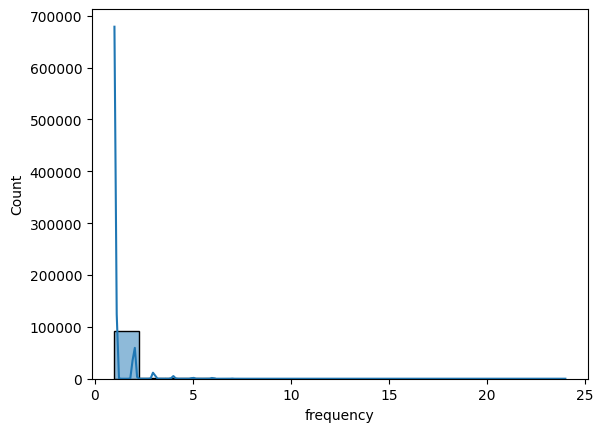

In [46]:
print(rfm_data[rfm_data['frequency']>1].shape[0] / rfm_data.shape[0])
print(rfm_data['frequency'].describe())
sns.histplot(x='frequency', data=rfm_data, kde=True)

Dari grafik di atas, terlihat bahwa frekuensi pembelian pelanggan merupakan masalah utama, karena hanya 12% pelanggan yang melakukan lebih dari satu pembelian. Hal ini cukup umum terjadi dalam e-commerce. Sebagian besar pelanggan hanya melakukan satu kali pembelian, dan dengan recency seperti yang telah dijelaskan sebelumnya, ini menunjukkan bahwa pelanggan cenderung melakukan pembelian yang sangat spesifik sesuai kebutuhan atau tujuan tertentu, daripada melakukan pembelian rutin atau berulang.

In [47]:
rfm_data.groupby('R')['monetary'].describe()

count        mean         std   min    25%   50%       75%       max
R                                                                        
0  10461.0  147.918702  258.298173  3.90  44.90  89.0  159.9000   7388.00
1  14134.0  139.788419  202.694645  2.29  48.90  86.8  152.3575   3999.98
2  17838.0  142.328274  224.401174  3.85  49.00  89.9  155.9975  13440.00
3  18811.0  135.596470  179.696420  2.99  45.90  89.0  150.0000   3700.00
4  17260.0  149.157619  224.089516  0.85  49.00  94.9  159.4925   4400.00
5  16916.0  142.142303  226.468832  2.20  46.35  89.0  151.0525   7160.00

count    95420.000000
mean       142.440198
std        217.656355
min          0.850000
25%         47.900000
50%         89.900000
75%        155.000000
max      13440.000000
Name: monetary, dtype: float64


<Axes: xlabel='monetary', ylabel='Count'>

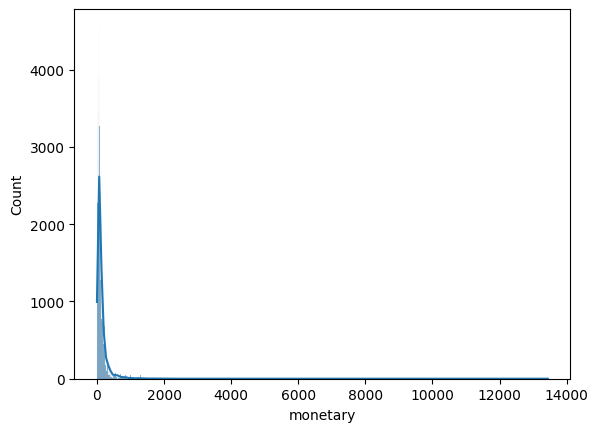

In [48]:
print(rfm_data['monetary'].describe())
sns.histplot(x='monetary', data=rfm_data, kde=True)

Rata-rata pengeluaran pelanggan adalah R\\$142, dengan 75% dari pelanggan menghabiskan kurang dari R\\$155, sementara pengeluaran tertinggi mencapai R\\$13440.

In [49]:
# Fungsi untuk menentukan segmen pelanggan berdasarkan nilai R, F, M
def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyalist'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customers Needing Attention'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Them"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

# Menerapkan fungsi segmentasi pada data RFM
rfm_data['segment'] = rfm_data.apply(get_segment, axis=1)

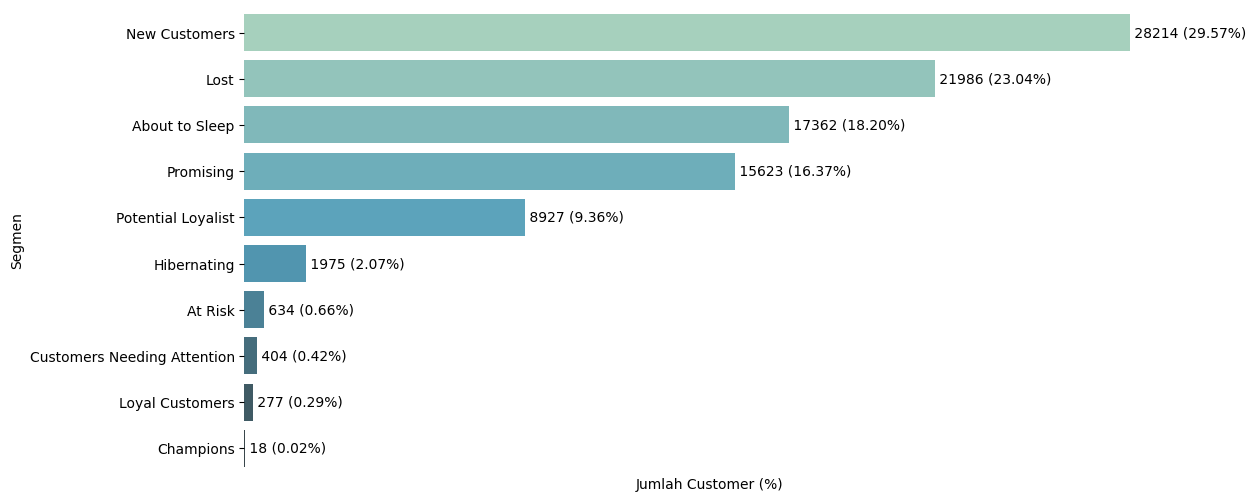

In [50]:
# Visualisasi segmen pelanggan dengan menggunakan barplot
plt.figure(figsize=(12, 6))

# Menghitung jumlah dan persentase pelanggan untuk setiap segmen
segment_counts = rfm_data['segment'].value_counts()
percentage = (segment_counts / segment_counts.sum() * 100).reset_index(name='percentage')
percentage['count'] = segment_counts.values
percentage.columns = ['segment', 'percentage', 'count']  # Pastikan nama kolom sesuai

# Membuat barplot
g = sns.barplot(x='percentage', y='segment', data=percentage, palette="GnBu_d")

# Menambahkan nilai persentase dan jumlah pada bar
for i, (perc, count) in enumerate(zip(percentage['percentage'], percentage['count'])):
    g.text(perc, i, f" {count} ({perc:.2f}%)", color='black', ha="left", va="center")

# Mengatur label dan menghapus ticks sumbu x
g.set_xlabel('Jumlah Customer (%)')
g.set_ylabel('Segmen')
g.set(xticks=[])

sns.despine(bottom=True, left=True)
plt.show()

Mayoritas pelanggan berada dalam segmen New Customers dan Lost, yang berarti bahwa E-commerce ini baik dalam menarik pelanggan baru tetapi perlu meningkatkan retensi pelanggan. Ada segmen yang menjanjikan seperti Promising dan Potential Loyalist yang bisa menjadi fokus untuk dijadikan loyalis. Loyal Customers dan Champions adalah segmen kecil tetapi sangat penting untuk dipertahankan karena mereka merupakan pelanggan yang paling berharga.

## Churn Prediction (ML)

### Data Preparation

In [51]:
# Menggabungkan data
df = (customers
      .merge(orders, how='left', on='customer_id')
      .merge(order_payments, on='order_id', how='left')
      .merge(order_items, on='order_id', how='left')
      .merge(products, on='product_id', how='left')
      .merge(order_reviews, on='order_id', how='left')
      .merge(product_category, on='product_category_name', how='left'))
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              118966 non-null  object 
 9   order_delivered_carrier_date   117057 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  payment_sequential            

In [52]:
# Menghapus Kolom yang Tidak Relevan
columns_to_drop = [
    'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_status',
    'seller_id', 'product_name_lenght', 'product_category_name',
    'product_description_lenght', 'product_length_cm', 'product_height_cm',
    'product_width_cm', 'product_photos_qty', 'review_creation_date',
    'review_answer_timestamp', 'review_comment_message'
]
df.drop(columns=columns_to_drop, inplace=True)

In [53]:
# Konversi Kolom ke Format Datetime
datetime_cols = [
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'shipping_limit_date', 'order_estimated_delivery_date'
]
df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime, errors='coerce')

# 4. Menambahkan Fitur Waktu
df['purchase_timestamp_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_timestamp_dow'] = df['order_purchase_timestamp'].dt.dayofweek
df['purchase_timestamp_hour'] = df['order_purchase_timestamp'].dt.hour

# Mengklasifikasikan waktu dalam bagian hari
def partofday(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['purchase_timestamp_pod'] = df['purchase_timestamp_hour'].apply(partofday)

# Menghitung Nilai Total
df['total_price'] = df['order_item_id'] * df['price']
df['total_freight_value'] = df['order_item_id'] * df['freight_value']
df['total_order_value'] = df['total_price'] + df['total_freight_value']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   order_id                       119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   payment_sequential             119140 non-null  float64       
 9   payment_type                   119140 non-null  object        
 10  payment_installments           119140 non-null  float64       
 11  

### Feature Engineering

In [54]:
# Agregasi Data untuk ML
df_ml = df.groupby('customer_unique_id').agg(
    total_order=('order_id', 'nunique'),
    first_purchase_date=('order_purchase_timestamp', 'min'),
    last_purchase_date=('order_purchase_timestamp', 'max'),
    avg_item_ordered=('order_item_id', 'mean'),
    avg_product_weight=('product_weight_g', 'mean'),
    average_order_value=('total_order_value', 'mean'),
    average_score=('review_score', 'mean'),
    total_order_in_review=('review_comment_title', 'count')
).reset_index()

In [55]:
# Feature Engineering
df_ml['delta_last_first'] = (df_ml['last_purchase_date'] - df_ml['first_purchase_date']).dt.days
df_ml['avg_days_per_order'] = df_ml['delta_last_first'] / df_ml['total_order']
df_ml['recency_by_day'] = (df['order_purchase_timestamp'].max() - df_ml['last_purchase_date']).dt.days
df_ml['rev_transaction_ratio'] = df_ml['total_order_in_review'] / df_ml['total_order']

# Fitur Tambahan dari Data Transaksi
# Fungsi untuk mendapatkan modus dengan menggunakan value_counts
def get_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

# Menggunakan agregasi yang lebih efisien
additional_features = df.groupby('customer_unique_id').agg(
    modus_dow_buy=('purchase_timestamp_dow', get_mode),
    modus_month_buy=('purchase_timestamp_month', get_mode),
    modus_partofday_buy=('purchase_timestamp_hour', lambda x: partofday(x.mode()[0] if not x.mode().empty else 0)),
    preferred_payment_type=('payment_type', get_mode),
    number_product_purchase_category=('product_category_name_english', 'nunique')
).reset_index()

# Menggabungkan fitur tambahan dengan df_ml
df_ml = df_ml.merge(additional_features, on='customer_unique_id', how='left')

# 10. Menghapus Kolom yang Tidak Diperlukan
df_ml.drop(['first_purchase_date', 'last_purchase_date'], axis=1, inplace=True)
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_unique_id                96096 non-null  object 
 1   total_order                       96096 non-null  int64  
 2   avg_item_ordered                  95420 non-null  float64
 3   avg_product_weight                95407 non-null  float64
 4   average_order_value               95420 non-null  float64
 5   average_score                     95380 non-null  float64
 6   total_order_in_review             96096 non-null  int64  
 7   delta_last_first                  96096 non-null  int64  
 8   avg_days_per_order                96096 non-null  float64
 9   recency_by_day                    96096 non-null  int64  
 10  rev_transaction_ratio             96096 non-null  float64
 11  modus_dow_buy                     96096 non-null  int32  
 12  modu

In [56]:
# Encoding Kategorikal dengan One-Hot Encoding
categorical_features = ['modus_dow_buy', 'modus_month_buy', 'modus_partofday_buy', 'preferred_payment_type']
df_ml = pd.get_dummies(df_ml, columns=categorical_features, drop_first=True)

# Menghapus Kolom yang Tidak Diperlukan Setelah Encoding
columns_to_drop_after_encoding = ['customer_unique_id']
df_ml.drop(columns=columns_to_drop_after_encoding, inplace=True, errors='ignore')

#Membuat Kolom Target 'is_churn'

def return_churn(recent):
    if recent > 153:
      return 1
    else:
      return 0
df_ml['is_churn'] = df_ml['recency_by_day'].apply(lambda rec: return_churn(rec))

# Menangani Missing Values
# Menggunakan SimpleImputer untuk menangani missing values secara lebih terstruktur
imputer = SimpleImputer(strategy='mean')
df_ml.fillna(df_ml.mean(), inplace=True)

df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   total_order                         96096 non-null  int64  
 1   avg_item_ordered                    96096 non-null  float64
 2   avg_product_weight                  96096 non-null  float64
 3   average_order_value                 96096 non-null  float64
 4   average_score                       96096 non-null  float64
 5   total_order_in_review               96096 non-null  int64  
 6   delta_last_first                    96096 non-null  int64  
 7   avg_days_per_order                  96096 non-null  float64
 8   recency_by_day                      96096 non-null  int64  
 9   rev_transaction_ratio               96096 non-null  float64
 10  number_product_purchase_category    96096 non-null  int64  
 11  modus_dow_buy_1                     96096

count    96096.000000
mean       287.735691
std        153.414676
min          0.000000
25%        163.000000
50%        268.000000
75%        397.000000
max        772.000000
Name: recency_by_day, dtype: float64


<Axes: xlabel='recency_by_day', ylabel='Count'>

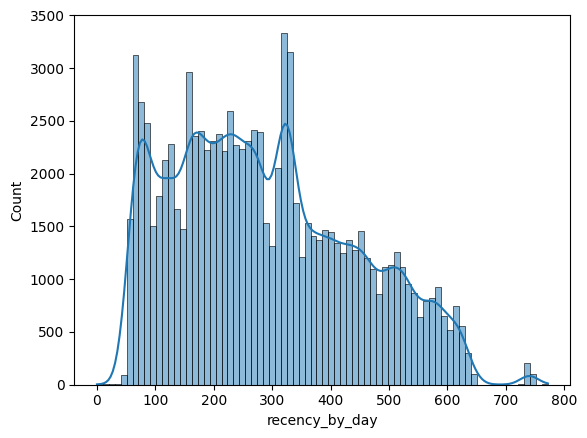

In [57]:
print(df_ml['recency_by_day'].describe())
sns.histplot(x='recency_by_day', data=df_ml, kde=True)

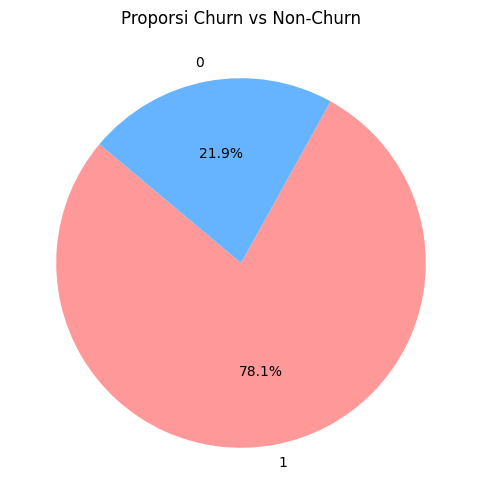

In [58]:
# Menghitung proporsi churn dan non-churn
churn_counts = df_ml['is_churn'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Proporsi Churn vs Non-Churn')
plt.show()

Target class imbalance dan perlu untuk ditangani agar dapat meningkat kan kinerja dari model dalam memprediksi kelas yang benar

### Modelling

In [59]:
# Scaling Data
# Memisahkan fitur dan target
X = df_ml.drop(columns=['is_churn', 'recency_by_day'], errors='ignore')
y = df_ml['is_churn']

In [60]:
# Menangani Imbalanced Data menggunakan SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Membagi Data menjadi Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Mendefinisikan dan Melatih Model
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Melatih dan mengevaluasi model
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores[name] = score

# Menampilkan Hasil Model
score_df = pd.DataFrame(list(scores.items()), columns=['Model', 'Score']).sort_values(by='Score', ascending=False)
print(score_df)

                 Model     Score
3        Random Forest  0.919313
6    Gradient Boosting  0.911115
2        Decision Tree  0.910482
1  Logistic Regression  0.902216
4                  LDA  0.900817
0          Naive Bayes  0.850158
5                  KNN  0.838560


Random Forest Test Score: 0.9193134477587069
Evaluation on Training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60008
           1       1.00      1.00      1.00     60009

    accuracy                           1.00    120017
   macro avg       1.00      1.00      1.00    120017
weighted avg       1.00      1.00      1.00    120017

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     15003
           1       0.92      0.92      0.92     15002

    accuracy                           0.92     30005
   macro avg       0.92      0.92      0.92     30005
weighted avg       0.92      0.92      0.92     30005



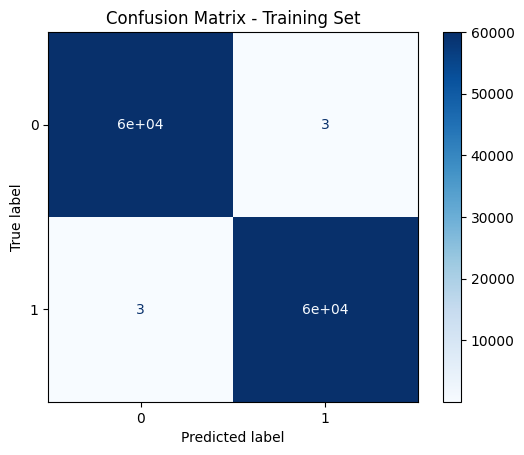

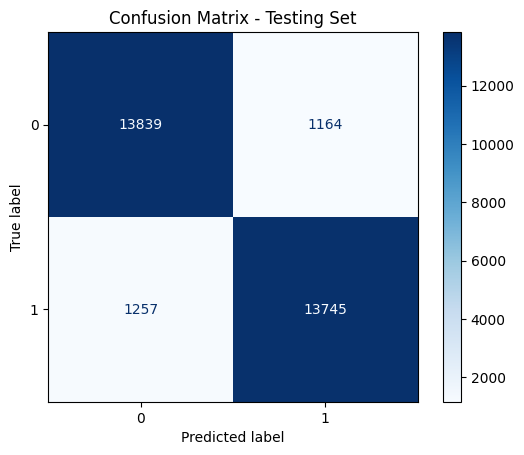

In [61]:
# Evaluasi Model
modelRF = RandomForestClassifier(random_state=42)
modelRF.fit(X_train, y_train)
score = modelRF.score(X_test, y_test)
print(f"Random Forest Test Score: {score}")

# Evaluasi pada Training set
print('Evaluation on Training \n', classification_report(y_train, modelRF.predict(X_train)))

# Evaluasi pada Testing set
print('Evaluation on Testing \n', classification_report(y_test, modelRF.predict(X_test)))

# Menampilkan Confusion Matrix untuk Training set
ConfusionMatrixDisplay.from_estimator(modelRF, X_train, y_train, cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Menampilkan Confusion Matrix untuk Testing set
ConfusionMatrixDisplay.from_estimator(modelRF, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Testing Set')
plt.show()

#### Hyperparameter Tuning

In [62]:
# Feature Selection menggunakan Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

sfm_selector = SelectFromModel(gbc, threshold='median')
sfm_selector.fit(X_train, y_train)
important_features = X_train.columns[sfm_selector.get_support()]
print("Fitur penting:", important_features)

# Hyperparameter Tuning dengan GridSearchCV
# Menggunakan pipeline untuk menggabungkan preprocessing dan model
pipeline = Pipeline([
    ('gbc', GradientBoostingClassifier(random_state=42))
])

# Parameter grid pertama
param_grid1 = {
    'gbc__loss': ['log_loss', 'deviance', 'exponential'],
    'gbc__criterion': ['friedman_mse', 'squared_error'],
}

grid_search1 = GridSearchCV(pipeline, param_grid1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search1.fit(X_train, y_train)
print("Best parameters (Grid Search 1):", grid_search1.best_params_)

# Parameter grid kedua
param_grid2 = {
    'gbc__learning_rate': [0.8, 0.85, 0.9],
    'gbc__n_estimators': [200, 300, 400],
    'gbc__subsample': [0.6, 0.8, 1.0]
}

grid_search2 = GridSearchCV(grid_search1.best_estimator_, param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search2.fit(X_train, y_train)
print("Best parameters (Grid Search 2):", grid_search2.best_params_)

Fitur penting: Index(['avg_product_weight', 'average_score', 'total_order_in_review',
       'avg_days_per_order', 'rev_transaction_ratio', 'modus_dow_buy_3',
       'modus_month_buy_3', 'modus_month_buy_4', 'modus_month_buy_5',
       'modus_month_buy_6', 'modus_month_buy_7', 'modus_month_buy_8',
       'modus_partofday_buy_evening', 'modus_partofday_buy_morning',
       'modus_partofday_buy_night', 'preferred_payment_type_credit_card',
       'preferred_payment_type_debit_card'],
      dtype='object')
Best parameters (Grid Search 1): {'gbc__criterion': 'friedman_mse', 'gbc__loss': 'log_loss'}
Best parameters (Grid Search 2): {'gbc__learning_rate': 0.8, 'gbc__n_estimators': 400, 'gbc__subsample': 1.0}


In [63]:
# Melatih Model Gradient Boosting dengan Parameter Terbaik
best_param = grid_search1.best_params_
best_params = grid_search2.best_params_
modelGBC2 = GradientBoostingClassifier(
    loss=best_param['gbc__loss'],
    criterion=best_param['gbc__criterion'],
    learning_rate=best_params['gbc__learning_rate'],
    n_estimators=best_params['gbc__n_estimators'],
    subsample=best_params['gbc__subsample'],
    random_state=42
)
modelGBC2.fit(X_train, y_train)
score = modelGBC2.score(X_test, y_test)
print(f"Gradient Boosting Classifier Test Score: {score}")

Gradient Boosting Classifier Test Score: 0.9309115147475421


Evaluation on Training 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     60008
           1       0.95      0.95      0.95     60009

    accuracy                           0.95    120017
   macro avg       0.95      0.95      0.95    120017
weighted avg       0.95      0.95      0.95    120017

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     15003
           1       0.93      0.93      0.93     15002

    accuracy                           0.93     30005
   macro avg       0.93      0.93      0.93     30005
weighted avg       0.93      0.93      0.93     30005



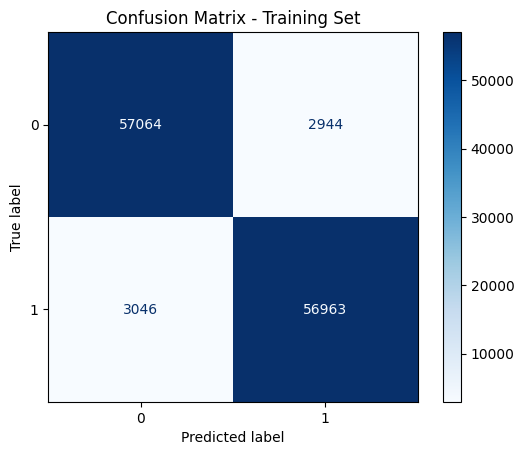

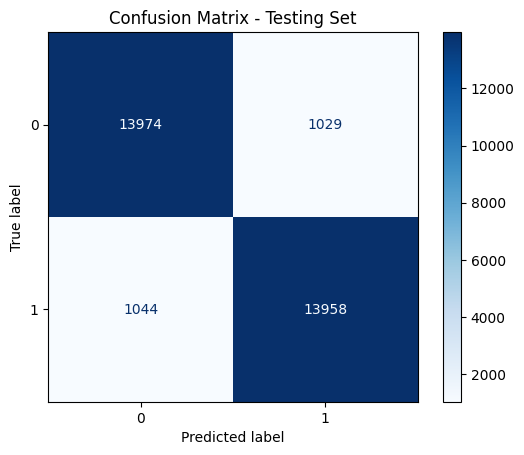

In [64]:
# Evaluasi Model
# Evaluasi pada Training set
print('Evaluation on Training \n', classification_report(y_train, modelGBC2.predict(X_train)))

# Evaluasi pada Testing set
print('Evaluation on Testing \n', classification_report(y_test, modelGBC2.predict(X_test)))

# Menampilkan Confusion Matrix untuk Training set
ConfusionMatrixDisplay.from_estimator(modelGBC2, X_train, y_train, cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Menampilkan Confusion Matrix untuk Testing set
ConfusionMatrixDisplay.from_estimator(modelGBC2, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Testing Set')
plt.show()